<a href="https://colab.research.google.com/github/kilkuwu/pytorch-deep-learning/blob/main/lessons/04/lesson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 04. Tập dữ liệu tùy chỉnh trong PyTorch (PyTorch Custom Datasets)

Trong notebook trước, [notebook 03](https://github.com/kilkuwu/pytorch-deep-learning/blob/main/lessons/03/lesson.ipynb), chúng ta đã tìm hiểu cách xây dựng các mô hình thị giác máy tính (computer vision) trên một tập dữ liệu (dataset) có sẵn trong PyTorch (FashionMNIST).

Các bước chúng ta đã thực hiện tương tự nhau trong nhiều vấn đề khác nhau của học máy (machine learning).

Tìm một tập dữ liệu (dataset), chuyển đổi tập dữ liệu thành các con số, xây dựng một mô hình (model) (hoặc tìm một mô hình có sẵn) để tìm ra các mẫu (patterns) trong những con số đó có thể được sử dụng để dự đoán (prediction).

PyTorch có nhiều tập dữ liệu (datasets) có sẵn được sử dụng cho một số lượng lớn các benchmark học máy (machine learning), tuy nhiên, bạn thường sẽ muốn sử dụng **tập dữ liệu tùy chỉnh (custom dataset)** của riêng mình.

## Tập dữ liệu tùy chỉnh (custom dataset) là gì?

**Tập dữ liệu tùy chỉnh (custom dataset)** là một tập hợp dữ liệu liên quan đến một vấn đề cụ thể mà bạn đang làm việc.

Về bản chất, một **tập dữ liệu tùy chỉnh (custom dataset)** có thể bao gồm hầu hết mọi thứ.

Ví dụ, nếu chúng ta đang xây dựng một ứng dụng phân loại hình ảnh thực phẩm như [Nutrify](https://nutrify.app), tập dữ liệu tùy chỉnh (custom dataset) của chúng ta có thể là các hình ảnh thực phẩm.

Hoặc nếu chúng ta đang cố gắng xây dựng một mô hình (model) để phân loại liệu một đánh giá dựa trên văn bản trên một trang web là tích cực hay tiêu cực, tập dữ liệu tùy chỉnh (custom dataset) của chúng ta có thể là các ví dụ về đánh giá của khách hàng hiện có và xếp hạng của họ.

Hoặc nếu chúng ta đang cố gắng xây dựng một ứng dụng phân loại âm thanh, tập dữ liệu tùy chỉnh (custom dataset) của chúng ta có thể là các mẫu âm thanh cùng với nhãn mẫu (labels) của chúng.

Hoặc nếu chúng ta đang cố gắng xây dựng một hệ thống gợi ý (recommendation system) cho khách hàng mua hàng trên trang web của chúng ta, tập dữ liệu tùy chỉnh (custom dataset) của chúng ta có thể là các ví dụ về sản phẩm mà người khác đã mua.

<img src="https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/04-pytorch-domain-libraries.png" alt="different pytorch domain libraries can be used for specific PyTorch problems" width=1000/>

*PyTorch bao gồm nhiều hàm (functions) có sẵn để tải các tập dữ liệu tùy chỉnh (custom datasets) khác nhau trong các thư viện miền (domain libraries) [`TorchVision`](https://pytorch.org/vision/stable/index.html), [`TorchText`](https://pytorch.org/text/stable/index.html), [`TorchAudio`](https://pytorch.org/audio/stable/index.html) và [`TorchRec`](https://pytorch.org/torchrec/).*

Nhưng đôi khi những hàm (functions) có sẵn này có thể không đủ.

Trong trường hợp đó, chúng ta luôn có thể tạo lớp con (subclass) của `torch.utils.data.Dataset` và tùy chỉnh nó theo ý thích của chúng ta.

## Những gì chúng ta sẽ tìm hiểu

Chúng ta sẽ áp dụng Quy trình PyTorch (PyTorch Workflow) mà chúng ta đã tìm hiểu trong [notebook 01](https://www.learnpytorch.io/01_pytorch_workflow/) và [notebook 02](https://www.learnpytorch.io/02_pytorch_classification/) vào một vấn đề thị giác máy tính (computer vision).

Nhưng thay vì sử dụng một tập dữ liệu (dataset) có sẵn trong PyTorch, chúng ta sẽ sử dụng tập dữ liệu (dataset) của riêng mình gồm các hình ảnh pizza, steak và sushi.

Mục tiêu sẽ là tải các hình ảnh này và sau đó xây dựng một mô hình (model) để huấn luyện (train) và dự đoán (predict) trên chúng.

<img src="https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/04-pytorch-food-vision-layout.png" alt="building a pipeline to load in food images and then building a pytorch model to classify those food images" width=800 />

*Những gì chúng ta sẽ xây dựng. Chúng ta sẽ sử dụng `torchvision.datasets` cũng như lớp `Dataset` tùy chỉnh (custom) của riêng chúng ta để tải các hình ảnh thực phẩm và sau đó chúng ta sẽ xây dựng một mô hình thị giác máy tính (computer vision model) PyTorch để hy vọng có thể phân loại chúng.*

Cụ thể, chúng ta sẽ tìm hiểu:

| **Chủ đề (Topic)** | **Nội dung (Contents)** |
| ----- | ----- |
| **0. Import PyTorch và thiết lập mã không phụ thuộc thiết bị (device-agnostic code)** | Hãy tải PyTorch và sau đó tuân theo thực hành tốt nhất để thiết lập mã của chúng ta không phụ thuộc vào thiết bị (device-agnostic). |
| **1. Lấy dữ liệu (Get data)** | Chúng ta sẽ sử dụng **tập dữ liệu tùy chỉnh (custom dataset)** của riêng mình gồm các hình ảnh pizza, steak và sushi. |
| **2. Hiểu rõ dữ liệu (chuẩn bị dữ liệu - data preparation)** | Ở đầu của bất kỳ vấn đề học máy (machine learning) mới nào, điều quan trọng nhất là hiểu dữ liệu mà bạn đang làm việc. Ở đây chúng ta sẽ thực hiện một số bước để tìm hiểu dữ liệu mà chúng ta có. |
| **3. Biến đổi dữ liệu (Transforming data)** | Thường thì, dữ liệu bạn nhận được sẽ không 100% sẵn sàng để sử dụng với một mô hình học máy (machine learning model), ở đây chúng ta sẽ xem xét một số bước chúng ta có thể thực hiện để *biến đổi (transform)* hình ảnh của chúng ta để chúng sẵn sàng được sử dụng với một mô hình (model). |
| **4. Tải dữ liệu với `ImageFolder` (tùy chọn 1)** | PyTorch có nhiều hàm tải dữ liệu (data loading functions) có sẵn cho các loại dữ liệu phổ biến. `ImageFolder` hữu ích nếu hình ảnh của chúng ta ở định dạng phân loại hình ảnh tiêu chuẩn (standard image classification format). |
| **5. Tải dữ liệu hình ảnh với `Dataset` tùy chỉnh (custom)** | Điều gì sẽ xảy ra nếu PyTorch không có hàm có sẵn (in-built function) để tải dữ liệu? Đây là nơi chúng ta có thể xây dựng lớp con tùy chỉnh (custom subclass) của riêng mình từ `torch.utils.data.Dataset`. |
| **6. Các hình thức biến đổi khác (tăng cường dữ liệu - data augmentation)** | Tăng cường dữ liệu (data augmentation) là một kỹ thuật phổ biến để mở rộng tính đa dạng của dữ liệu huấn luyện (training data) của bạn. Ở đây chúng ta sẽ khám phá một số hàm tăng cường dữ liệu (data augmentation functions) có sẵn của `torchvision`. |
| **7. Mô hình 0 (Model 0): TinyVGG không có tăng cường dữ liệu (data augmentation)** | Đến giai đoạn này, chúng ta sẽ có dữ liệu sẵn sàng, hãy xây dựng một mô hình (model) có khả năng khớp với nó. Chúng ta cũng sẽ tạo một số hàm huấn luyện (training functions) và kiểm tra (testing functions) để huấn luyện (train) và đánh giá (evaluate) mô hình (model) của chúng ta. |
| **8. Khám phá đường cong mất mát (loss curves)** | Đường cong mất mát (loss curves) là một cách tuyệt vời để xem mô hình (model) của bạn đang huấn luyện (training)/cải thiện như thế nào theo thời gian. Chúng cũng là một cách tốt để xem liệu mô hình (model) của bạn có bị **thiếu khớp (underfitting)** hay **quá khớp (overfitting)** không. |
| **9. Mô hình 1 (Model 1): TinyVGG với tăng cường dữ liệu (data augmentation)** | Bây giờ, chúng ta đã thử một mô hình (model) *không có*, còn thử một mô hình *có* tăng cường dữ liệu (data augmentation) thì sao? |
| **10. So sánh kết quả mô hình (Compare model results)** | Hãy so sánh đường cong mất mát (loss curves) của các mô hình (models) khác nhau và xem mô hình nào hoạt động tốt hơn và thảo luận một số tùy chọn để cải thiện hiệu suất (performance). |
| **11. Thực hiện dự đoán (prediction) trên hình ảnh tùy chỉnh (custom image)** | Mô hình (model) của chúng ta được huấn luyện (trained) trên một tập dữ liệu (dataset) gồm các hình ảnh pizza, steak và sushi. Trong phần này, chúng ta sẽ tìm hiểu cách sử dụng mô hình đã huấn luyện (trained model) của chúng ta để dự đoán (predict) trên một hình ảnh *bên ngoài* tập dữ liệu (dataset) hiện có của chúng ta. |

## 0. Import PyTorch và thiết lập mã không phụ thuộc thiết bị (device-agnostic code)

In [1]:
import torch
from torch import nn

# Lưu ý: notebook này yêu cầu torch >= 1.10.0
torch.__version__

'2.6.0+cu124'

Và bây giờ hãy tuân theo thực hành tốt nhất và thiết lập mã không phụ thuộc thiết bị (device-agnostic code).

> **Lưu ý:** Nếu bạn đang sử dụng Google Colab và chưa bật GPU, thì đây là lúc để bật nó qua `Runtime -> Change runtime type -> Hardware accelerator -> GPU`. Nếu bạn làm điều này, runtime của bạn có thể sẽ reset và bạn sẽ phải chạy lại tất cả các cell ở trên bằng cách chọn `Runtime -> Run before`.

In [2]:
# Thiết lập mã không phụ thuộc thiết bị (device-agnostic code)
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

## 1. Lấy dữ liệu (Get data)

Trước tiên, chúng ta cần một số dữ liệu (data).

Và giống như bất kỳ chương trình nấu ăn tốt nào, một số dữ liệu (data) đã được chuẩn bị sẵn cho chúng ta.

Chúng ta sẽ bắt đầu từ nhỏ.

Bởi vì chúng ta không muốn huấn luyện (train) mô hình (model) lớn nhất hoặc sử dụng tập dữ liệu (dataset) lớn nhất ngay từ đầu.

Học máy (machine learning) là một quá trình lặp đi lặp lại, bắt đầu từ nhỏ, làm cho cái gì đó hoạt động và tăng lên khi cần thiết.

Dữ liệu (data) mà chúng ta sẽ sử dụng là một tập con của [tập dữ liệu Food101 (Food101 dataset)](https://data.vision.ee.ethz.ch/cvl/datasets_extra/food-101/).

Food101 là một benchmark thị giác máy tính (computer vision) phổ biến vì nó chứa 1000 hình ảnh của 101 loại thực phẩm khác nhau, tổng cộng 101,000 hình ảnh (75,750 hình ảnh huấn luyện - train và 25,250 hình ảnh kiểm tra - test).

Bạn có thể nghĩ ra 101 loại thực phẩm khác nhau không?

Bạn có thể nghĩ ra một chương trình máy tính để phân loại 101 loại thực phẩm không?

Tôi có thể.

Một mô hình học máy (machine learning model)!

Cụ thể, một mô hình thị giác máy tính (computer vision model) PyTorch như chúng ta đã tìm hiểu trong [notebook 03](https://www.learnpytorch.io/03_pytorch_computer_vision/).

Tuy nhiên, thay vì 101 lớp thực phẩm (food classes), chúng ta sẽ bắt đầu với 3 lớp: pizza, steak và sushi.

Và thay vì 1,000 hình ảnh cho mỗi lớp (class), chúng ta sẽ bắt đầu với 10% ngẫu nhiên (bắt đầu từ nhỏ, tăng lên khi cần thiết).

Nếu bạn muốn xem dữ liệu (data) đến từ đâu, bạn có thể xem các tài nguyên sau:
* [Trang web tập dữ liệu và bài báo Food101 gốc (Original Food101 dataset and paper website)](https://data.vision.ee.ethz.ch/cvl/datasets_extra/food-101/).
* [`torchvision.datasets.Food101`](https://pytorch.org/vision/main/generated/torchvision.datasets.Food101.html) - phiên bản dữ liệu (data) mà tôi đã tải xuống cho notebook này.
* [`extras/04_custom_data_creation.ipynb`](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/extras/04_custom_data_creation.ipynb) - một notebook mà tôi đã sử dụng để định dạng tập dữ liệu Food101 (Food101 dataset) để sử dụng cho notebook này.
* [`data/pizza_steak_sushi.zip`](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/data/pizza_steak_sushi.zip) - tệp nén (zip archive) của các hình ảnh pizza, steak và sushi từ Food101, được tạo bằng notebook được liên kết ở trên.

Hãy viết một số mã (code) để tải xuống dữ liệu (data) đã được định dạng từ GitHub.

> **Lưu ý:** Tập dữ liệu (dataset) mà chúng ta sắp sử dụng đã được định dạng trước cho những gì chúng ta muốn sử dụng. Tuy nhiên, bạn thường sẽ phải định dạng tập dữ liệu (datasets) của riêng mình cho bất kỳ vấn đề nào bạn đang làm việc. Đây là một thực hành thường xuyên trong thế giới học máy (machine learning).

In [3]:
import requests
import zipfile
from pathlib import Path

# Thiết lập đường dẫn đến thư mục dữ liệu (data folder)
data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi"

# Nếu thư mục hình ảnh không tồn tại, tải xuống và chuẩn bị nó...
if image_path.is_dir():
    print(f"{image_path} directory exists.")
else:
    print(f"Did not find {image_path} directory, creating one...")
    image_path.mkdir(parents=True, exist_ok=True)

    # Tải xuống dữ liệu pizza, steak, sushi
    with open(data_path / "pizza_steak_sushi.zip", "wb") as f:
        request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
        print("Downloading pizza, steak, sushi data...")
        f.write(request.content)

    # Giải nén dữ liệu pizza, steak, sushi
    with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip", "r") as zip_ref:
        print("Unzipping pizza, steak, sushi data...")
        zip_ref.extractall(image_path)

data/pizza_steak_sushi directory exists.


## 2. Hiểu rõ dữ liệu (chuẩn bị dữ liệu - data preparation)

Tập dữ liệu (dataset) đã được tải xuống!

Đã đến lúc hiểu rõ nó.

Đây là một bước quan trọng khác trước khi xây dựng một mô hình (model).

Như Abraham Lossfunction đã nói...

<img src="https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/04-abraham-lossfunction.png" alt="tweet by mrdbourke, if I had eight hours to build a machine learning model, I'd spend the first 6 hours preparing my dataset" width=800/>

*Chuẩn bị dữ liệu (data preparation) là tối quan trọng. Trước khi xây dựng một mô hình (model), hãy hiểu rõ dữ liệu (data). Hãy tự hỏi: Tôi đang cố gắng làm gì ở đây? Nguồn: [@mrdbourke Twitter](https://twitter.com/mrdbourke).*

Việc kiểm tra dữ liệu (data) và hiểu rõ nó là gì?

Trước khi bắt đầu một dự án hoặc xây dựng bất kỳ loại mô hình (model) nào, điều quan trọng là phải biết bạn đang làm việc với dữ liệu (data) gì.

Trong trường hợp của chúng ta, chúng ta có các hình ảnh pizza, steak và sushi ở định dạng phân loại hình ảnh tiêu chuẩn (standard image classification format).

Định dạng phân loại hình ảnh (image classification format) chứa các lớp hình ảnh (classes of images) riêng biệt trong các thư mục riêng biệt được đặt tên với tên lớp (class name) cụ thể.

Ví dụ, tất cả các hình ảnh của `pizza` được chứa trong thư mục `pizza/`.

Định dạng này phổ biến trên nhiều benchmark phân loại hình ảnh (image classification benchmarks) khác nhau, bao gồm [ImageNet](https://www.image-net.org/) (một trong những tập dữ liệu benchmark thị giác máy tính - computer vision benchmark datasets phổ biến nhất).

Bạn có thể xem một ví dụ về định dạng lưu trữ bên dưới, các số hình ảnh là tùy ý.

```
pizza_steak_sushi/ <- thư mục tập dữ liệu tổng thể (overall dataset folder)
    train/ <- hình ảnh huấn luyện (training images)
        pizza/ <- tên lớp làm tên thư mục (class name as folder name)
            image01.jpeg
            image02.jpeg
            ...
        steak/
            image24.jpeg
            image25.jpeg
            ...
        sushi/
            image37.jpeg
            ...
    test/ <- hình ảnh kiểm tra (testing images)
        pizza/
            image101.jpeg
            image102.jpeg
            ...
        steak/
            image154.jpeg
            image155.jpeg
            ...
        sushi/
            image167.jpeg
            ...
```

Mục tiêu sẽ là **lấy cấu trúc lưu trữ dữ liệu (data storage structure) này và biến nó thành một tập dữ liệu (dataset) có thể sử dụng được với PyTorch**.

> **Lưu ý:** Cấu trúc của dữ liệu (data) mà bạn làm việc sẽ khác nhau tùy thuộc vào vấn đề bạn đang làm việc. Nhưng tiền đề vẫn còn: hiểu rõ dữ liệu (data), sau đó tìm cách tốt nhất để biến nó thành một tập dữ liệu (dataset) tương thích với PyTorch.

Chúng ta có thể kiểm tra những gì có trong thư mục dữ liệu (data directory) của chúng ta bằng cách viết một hàm trợ giúp nhỏ (helper function) để duyệt qua từng thư mục con và đếm các tệp hiện có.

Để làm điều đó, chúng ta sẽ sử dụng [`os.walk()`](https://docs.python.org/3/library/os.html#os.walk) có sẵn của Python.

In [4]:
import os
def walk_through_dir(dir_path):
  """
  Duyệt qua dir_path trả về nội dung của nó.
  Args:
    dir_path (str or pathlib.Path): thư mục đích (target directory)

  Returns:
    In ra:
      số lượng thư mục con trong dir_path
      số lượng hình ảnh (files) trong mỗi thư mục con
      tên của mỗi thư mục con
  """
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

In [5]:
walk_through_dir(image_path)

There are 2 directories and 0 images in 'data/pizza_steak_sushi'.
There are 3 directories and 0 images in 'data/pizza_steak_sushi/test'.
There are 0 directories and 31 images in 'data/pizza_steak_sushi/test/sushi'.
There are 0 directories and 19 images in 'data/pizza_steak_sushi/test/steak'.
There are 0 directories and 25 images in 'data/pizza_steak_sushi/test/pizza'.
There are 3 directories and 0 images in 'data/pizza_steak_sushi/train'.
There are 0 directories and 72 images in 'data/pizza_steak_sushi/train/sushi'.
There are 0 directories and 75 images in 'data/pizza_steak_sushi/train/steak'.
There are 0 directories and 78 images in 'data/pizza_steak_sushi/train/pizza'.


Tuyệt vời!

Có vẻ như chúng ta có khoảng 75 hình ảnh cho mỗi lớp huấn luyện (training class) và 25 hình ảnh cho mỗi lớp kiểm tra (testing class).

Điều đó sẽ đủ để bắt đầu.

Hãy nhớ rằng, những hình ảnh này là tập con của tập dữ liệu Food101 gốc (original Food101 dataset).

Bạn có thể xem cách chúng được tạo ra trong [notebook tạo dữ liệu (data creation notebook)](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/extras/04_custom_data_creation.ipynb).

Trong khi chúng ta đang làm điều này, hãy thiết lập các đường dẫn huấn luyện (training) và kiểm tra (testing) của chúng ta.

In [6]:
# Thiết lập đường dẫn huấn luyện (training) và kiểm tra (testing)
train_dir = image_path / "train"
test_dir = image_path / "test"

train_dir, test_dir

(PosixPath('data/pizza_steak_sushi/train'),
 PosixPath('data/pizza_steak_sushi/test'))

### 2.1 Trực quan hóa một hình ảnh (Visualize an image)

Được rồi, chúng ta đã thấy cấu trúc thư mục của chúng ta được định dạng như thế nào.

Bây giờ theo tinh thần của nhà khám phá dữ liệu (data explorer), đã đến lúc *trực quan hóa, trực quan hóa, trực quan hóa!*

Hãy viết một số mã (code) để:
1. Lấy tất cả các đường dẫn hình ảnh bằng cách sử dụng [`pathlib.Path.glob()`](https://docs.python.org/3/library/pathlib.html#pathlib.Path.glob) để tìm tất cả các tệp kết thúc bằng `.jpg`.
2. Chọn một đường dẫn hình ảnh ngẫu nhiên bằng cách sử dụng [`random.choice()`](https://docs.python.org/3/library/random.html#random.choice) của Python.
3. Lấy tên lớp hình ảnh (image class name) bằng cách sử dụng [`pathlib.Path.parent.stem`](https://docs.python.org/3/library/pathlib.html#pathlib.PurePath.parent).
4. Và vì chúng ta đang làm việc với hình ảnh, chúng ta sẽ mở đường dẫn hình ảnh ngẫu nhiên bằng cách sử dụng [`PIL.Image.open()`](https://pillow.readthedocs.io/en/stable/reference/Image.html#PIL.Image.open) (PIL là viết tắt của Python Image Library).
5. Sau đó chúng ta sẽ hiển thị hình ảnh và in một số metadata.

Random image path: data/pizza_steak_sushi/test/pizza/648055.jpg
Image class: pizza
Image height: 512
Image width: 512


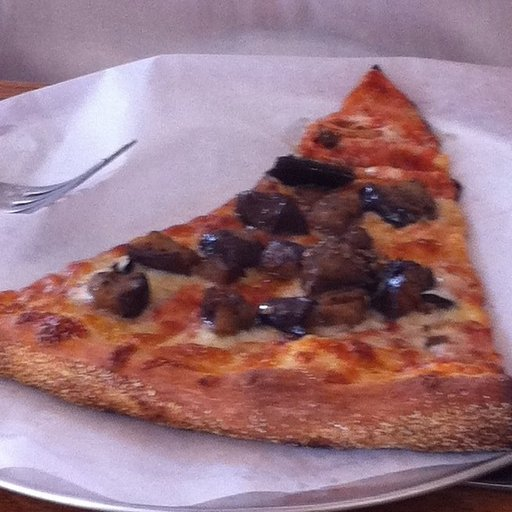

In [7]:
import random
from PIL import Image

# Thiết lập seed
random.seed(42) # <- thử thay đổi cái này và xem điều gì sẽ xảy ra

# 1. Lấy tất cả đường dẫn hình ảnh (* có nghĩa là "bất kỳ tổ hợp nào")
image_path_list = list(image_path.glob("*/*/*.jpg"))

# 2. Lấy đường dẫn hình ảnh ngẫu nhiên
random_image_path = random.choice(image_path_list)

# 3. Lấy lớp hình ảnh từ tên đường dẫn (lớp hình ảnh là tên của thư mục nơi hình ảnh được lưu trữ)
image_class = random_image_path.parent.stem

# 4. Mở hình ảnh
img = Image.open(random_image_path)

# 5. In metadata
print(f"Random image path: {random_image_path}")
print(f"Image class: {image_class}")
print(f"Image height: {img.height}")
print(f"Image width: {img.width}")
img

Chúng ta có thể làm tương tự với [`matplotlib.pyplot.imshow()`](https://matplotlib.org/3.5.0/api/_as_gen/matplotlib.pyplot.imshow.html), ngoại trừ việc chúng ta phải chuyển đổi hình ảnh thành mảng NumPy trước.

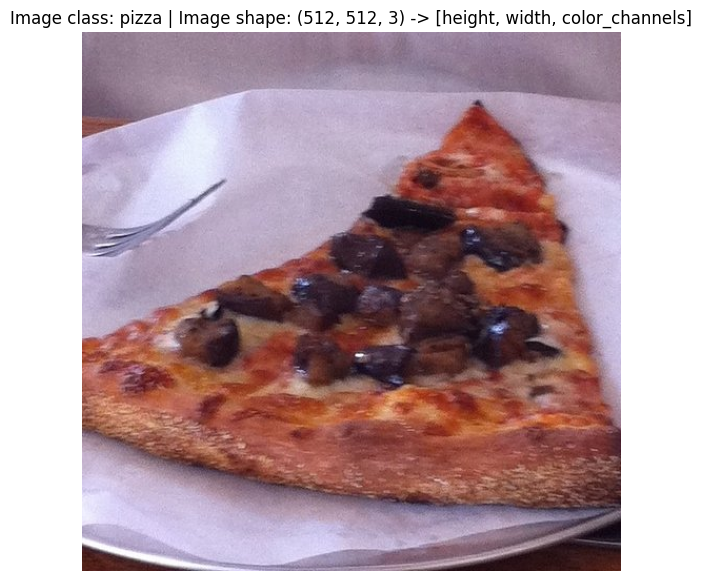

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Chuyển hình ảnh thành một mảng (array)
img_as_array = np.asarray(img)

# Vẽ hình ảnh với matplotlib
plt.figure(figsize=(10, 7))
plt.imshow(img_as_array)
plt.title(f"Image class: {image_class} | Image shape: {img_as_array.shape} -> [height, width, color_channels]")
plt.axis(False);

## 3. Biến đổi dữ liệu (Transforming data)

Bây giờ nếu chúng ta muốn tải dữ liệu hình ảnh (image data) của chúng ta vào PyTorch thì sao?

Trước khi chúng ta có thể sử dụng dữ liệu hình ảnh (image data) của mình với PyTorch, chúng ta cần:

1. Biến nó thành tensor (biểu diễn số học của hình ảnh của chúng ta).
2. Biến nó thành `torch.utils.data.Dataset` và sau đó thành `torch.utils.data.DataLoader`, chúng ta sẽ gọi chúng là `Dataset` và `DataLoader` cho ngắn gọn.

Có một số loại tập dữ liệu (datasets) và trình tải tập dữ liệu (dataset loaders) được xây dựng sẵn khác nhau cho PyTorch, tùy thuộc vào vấn đề bạn đang làm việc.

| **Không gian vấn đề (Problem space)** | **Tập dữ liệu và hàm được xây dựng sẵn (Pre-built Datasets and Functions)** |
| ----- | ----- |
| **Thị giác (Vision)** | [`torchvision.datasets`](https://pytorch.org/vision/stable/datasets.html) |
| **Âm thanh (Audio)** | [`torchaudio.datasets`](https://pytorch.org/audio/stable/datasets.html) |
| **Văn bản (Text)** | [`torchtext.datasets`](https://pytorch.org/text/stable/datasets.html) |
| **Hệ thống gợi ý (Recommendation system)** | [`torchrec.datasets`](https://pytorch.org/torchrec/torchrec.datasets.html) |

Vì chúng ta đang làm việc với một vấn đề thị giác (vision problem), chúng ta sẽ xem xét `torchvision.datasets` cho các hàm tải dữ liệu (data loading functions) của chúng ta cũng như [`torchvision.transforms`](https://pytorch.org/vision/stable/transforms.html) để chuẩn bị dữ liệu (data) của chúng ta.

Hãy import một số thư viện cơ bản.

In [9]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

### 3.1 Biến đổi dữ liệu với `torchvision.transforms`

Chúng ta có các thư mục hình ảnh nhưng trước khi chúng ta có thể sử dụng chúng với PyTorch, chúng ta cần chuyển đổi chúng thành tensor.

Một trong những cách chúng ta có thể làm điều này là bằng cách sử dụng module `torchvision.transforms`.

`torchvision.transforms` chứa nhiều phương thức được xây dựng sẵn để định dạng hình ảnh, biến chúng thành tensor và thậm chí thao tác chúng cho mục đích **tăng cường dữ liệu (data augmentation)** (thực hành thay đổi dữ liệu để làm cho việc học của mô hình (model) khó khăn hơn, chúng ta sẽ thấy điều này sau).

Để có kinh nghiệm với `torchvision.transforms`, hãy viết một loạt các bước biến đổi (transform steps) để:
1. Thay đổi kích thước hình ảnh bằng cách sử dụng [`transforms.Resize()`](https://pytorch.org/vision/stable/generated/torchvision.transforms.Resize.html#torchvision.transforms.Resize) (từ khoảng 512x512 đến 64x64, cùng hình dạng với các hình ảnh trên [trang web CNN Explainer](https://poloclub.github.io/cnn-explainer/)).
2. Lật hình ảnh của chúng ta một cách ngẫu nhiên theo chiều ngang bằng cách sử dụng [`transforms.RandomHorizontalFlip()`](https://pytorch.org/vision/stable/generated/torchvision.transforms.RandomHorizontalFlip.html#torchvision.transforms.RandomHorizontalFlip) (điều này có thể được coi là một hình thức tăng cường dữ liệu - data augmentation vì nó sẽ thay đổi dữ liệu hình ảnh (image data) của chúng ta một cách nhân tạo).
3. Biến hình ảnh của chúng ta từ hình ảnh PIL thành tensor PyTorch bằng cách sử dụng [`transforms.ToTensor()`](https://pytorch.org/vision/stable/generated/torchvision.transforms.ToTensor.html#torchvision.transforms.ToTensor).

Chúng ta có thể biên dịch tất cả các bước này bằng cách sử dụng [`torchvision.transforms.Compose()`](https://pytorch.org/vision/stable/generated/torchvision.transforms.Compose.html#torchvision.transforms.Compose).

In [10]:
# Viết transform cho hình ảnh
data_transform = transforms.Compose([
    # Thay đổi kích thước hình ảnh thành 64x64
    transforms.Resize(size=(64, 64)),
    # Lật hình ảnh ngẫu nhiên theo chiều ngang
    transforms.RandomHorizontalFlip(p=0.5), # p = xác suất lật, 0.5 = 50% cơ hội
    # Biến hình ảnh thành torch.Tensor
    transforms.ToTensor() # điều này cũng chuyển đổi tất cả giá trị pixel từ 0 đến 255 thành giữa 0.0 và 1.0
])

Bây giờ chúng ta đã có một tập hợp các biến đổi (composition of transforms), hãy viết một hàm (function) để thử chúng trên nhiều hình ảnh khác nhau.

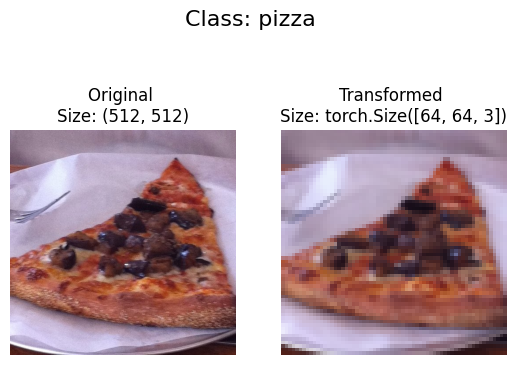

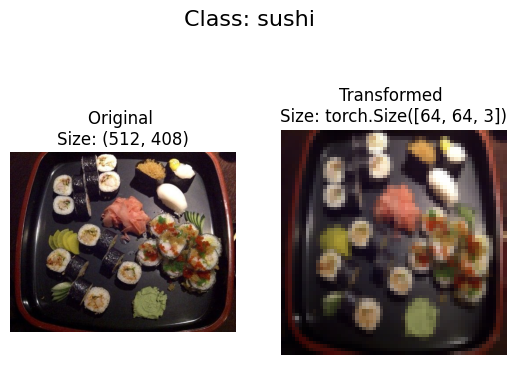

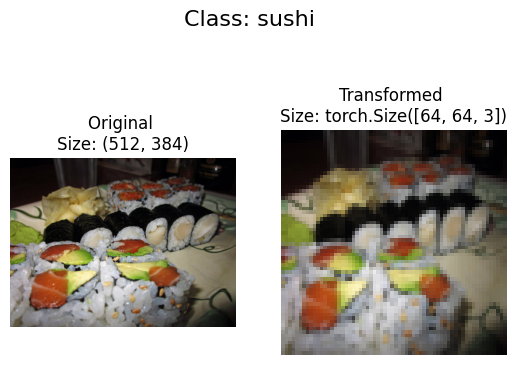

In [11]:
def plot_transformed_images(image_paths, transform, n=3, seed=42):
    """Vẽ một loạt hình ảnh ngẫu nhiên từ image_paths.

    Sẽ mở n đường dẫn hình ảnh từ image_paths, biến đổi chúng
    với transform và vẽ chúng cạnh nhau.

    Args:
        image_paths (list): Danh sách các đường dẫn hình ảnh đích.
        transform (PyTorch Transforms): Các biến đổi để áp dụng cho hình ảnh.
        n (int, optional): Số lượng hình ảnh để vẽ. Mặc định là 3.
        seed (int, optional): Seed ngẫu nhiên cho bộ tạo ngẫu nhiên. Mặc định là 42.
    """
    random.seed(seed)
    random_image_paths = random.sample(image_paths, k=n)
    for image_path in random_image_paths:
        with Image.open(image_path) as f:
            fig, ax = plt.subplots(1, 2)
            ax[0].imshow(f)
            ax[0].set_title(f"Original \nSize: {f.size}")
            ax[0].axis("off")

            # Biến đổi và vẽ hình ảnh
            # Lưu ý: permute() sẽ thay đổi hình dạng của hình ảnh để phù hợp với matplotlib
            # (Mặc định của PyTorch là [C, H, W] nhưng Matplotlib là [H, W, C])
            transformed_image = transform(f).permute(1, 2, 0)
            ax[1].imshow(transformed_image)
            ax[1].set_title(f"Transformed \nSize: {transformed_image.shape}")
            ax[1].axis("off")

            fig.suptitle(f"Class: {image_path.parent.stem}", fontsize=16)

plot_transformed_images(image_path_list,
                        transform=data_transform,
                        n=3)

Tuyệt vời!

Bây giờ chúng ta đã có một cách để chuyển đổi hình ảnh của chúng ta thành tensor bằng cách sử dụng `torchvision.transforms`.

Chúng ta cũng thao tác kích thước và hướng của chúng nếu cần (một số mô hình - models thích hình ảnh có kích thước và hình dạng khác nhau).

Nói chung, hình dạng (shape) của hình ảnh càng lớn, mô hình (model) càng có thể khôi phục nhiều thông tin hơn.

Ví dụ, một hình ảnh có kích thước `[256, 256, 3]` sẽ có nhiều pixel gấp 16 lần so với hình ảnh có kích thước `[64, 64, 3]` (`(256*256*3)/(64*64*3)=16`).

Tuy nhiên, sự đánh đổi (tradeoff) là nhiều pixel hơn đòi hỏi nhiều tính toán (computations) hơn.

> **Bài tập (Exercise):** Thử comment out một trong các transform trong `data_transform` và chạy lại hàm vẽ `plot_transformed_images()`, điều gì sẽ xảy ra?

## 4. Tùy chọn 1 (Option 1): Tải dữ liệu hình ảnh bằng [`ImageFolder`](https://pytorch.org/vision/stable/generated/torchvision.datasets.ImageFolder.html#torchvision.datasets.ImageFolder)

Được rồi, đã đến lúc biến dữ liệu hình ảnh (image data) của chúng ta thành một `Dataset` có khả năng được sử dụng với PyTorch.

Vì dữ liệu (data) của chúng ta ở định dạng phân loại hình ảnh tiêu chuẩn (standard image classification format), chúng ta có thể sử dụng lớp (class) [`torchvision.datasets.ImageFolder`](https://pytorch.org/vision/stable/generated/torchvision.datasets.ImageFolder.html#torchvision.datasets.ImageFolder).

Ở đây chúng ta có thể truyền cho nó đường dẫn tệp của thư mục hình ảnh đích (target image directory) cũng như một loạt các biến đổi (transforms) mà chúng ta muốn thực hiện trên hình ảnh của mình.

Hãy thử nghiệm nó trên các thư mục dữ liệu (data folders) `train_dir` và `test_dir` của chúng ta, truyền vào `transform=data_transform` để biến hình ảnh của chúng ta thành tensor.

In [12]:
# Sử dụng ImageFolder để tạo dataset(s)
from torchvision import datasets
train_data = datasets.ImageFolder(root=train_dir, # thư mục đích của hình ảnh
                                  transform=data_transform, # các biến đổi để thực hiện trên dữ liệu (hình ảnh)
                                  target_transform=None) # các biến đổi để thực hiện trên nhãn (nếu cần thiết)

test_data = datasets.ImageFolder(root=test_dir,
                                 transform=data_transform)

print(f"Train data:\n{train_data}\nTest data:\n{test_data}")

Train data:
Dataset ImageFolder
    Number of datapoints: 225
    Root location: data/pizza_steak_sushi/train
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )
Test data:
Dataset ImageFolder
    Number of datapoints: 75
    Root location: data/pizza_steak_sushi/test
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )


Tuyệt vời!

Có vẻ như PyTorch đã đăng ký `Dataset` của chúng ta.

Hãy kiểm tra chúng bằng cách xem các thuộc tính `classes` và `class_to_idx` cũng như độ dài của các tập huấn luyện (training sets) và kiểm tra (test sets) của chúng ta.

In [13]:
# Lấy tên các lớp (class names) dưới dạng danh sách (list)
class_names = train_data.classes
class_names

['pizza', 'steak', 'sushi']

In [14]:
# Cũng có thể lấy tên các lớp (class names) dưới dạng từ điển (dict)
class_dict = train_data.class_to_idx
class_dict

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [15]:
# Kiểm tra độ dài (lengths)
len(train_data), len(test_data)

(225, 75)

Tuyệt! Có vẻ như chúng ta sẽ có thể sử dụng những thứ này để tham chiếu sau này.

Còn hình ảnh và nhãn (labels) của chúng ta thì sao?

Chúng trông như thế nào?

Chúng ta có thể lập chỉ mục (index) trên `Dataset` `train_data` và `test_data` của chúng ta để tìm các mẫu (samples) và nhãn đích (target labels) của chúng.

In [16]:
img, label = train_data[0][0], train_data[0][1]
print(f"Image tensor:\n{img}")
print(f"Image shape: {img.shape}")
print(f"Image datatype: {img.dtype}")
print(f"Image label: {label}")
print(f"Label datatype: {type(label)}")

Image tensor:
tensor([[[0.1137, 0.1020, 0.0980,  ..., 0.1255, 0.1216, 0.1176],
         [0.1059, 0.0980, 0.0980,  ..., 0.1294, 0.1294, 0.1294],
         [0.1020, 0.0980, 0.0941,  ..., 0.1333, 0.1333, 0.1333],
         ...,
         [0.1098, 0.1098, 0.1255,  ..., 0.1686, 0.1647, 0.1686],
         [0.0902, 0.0941, 0.1098,  ..., 0.1686, 0.1647, 0.1686],
         [0.0863, 0.0863, 0.0980,  ..., 0.1686, 0.1647, 0.1647]],

        [[0.0745, 0.0706, 0.0745,  ..., 0.0588, 0.0588, 0.0588],
         [0.0745, 0.0706, 0.0745,  ..., 0.0627, 0.0627, 0.0627],
         [0.0706, 0.0745, 0.0745,  ..., 0.0706, 0.0706, 0.0706],
         ...,
         [0.1255, 0.1333, 0.1373,  ..., 0.2510, 0.2392, 0.2392],
         [0.1098, 0.1176, 0.1255,  ..., 0.2510, 0.2392, 0.2314],
         [0.1020, 0.1059, 0.1137,  ..., 0.2431, 0.2353, 0.2275]],

        [[0.0941, 0.0902, 0.0902,  ..., 0.0157, 0.0196, 0.0196],
         [0.0902, 0.0863, 0.0902,  ..., 0.0196, 0.0157, 0.0196],
         [0.0902, 0.0902, 0.0902,  ..., 0.01

Hình ảnh của chúng ta hiện đang ở dạng tensor (với hình dạng - shape `[3, 64, 64]`) và các nhãn (labels) ở dạng số nguyên liên quan đến một lớp (class) cụ thể (như được tham chiếu bởi thuộc tính `class_to_idx`).

Còn việc vẽ một tensor hình ảnh đơn lẻ bằng `matplotlib` thì sao?

Đầu tiên chúng ta sẽ phải permute (sắp xếp lại thứ tự các chiều của nó) để nó tương thích.

Hiện tại các chiều hình ảnh (image dimensions) của chúng ta đang ở định dạng `CHW` (color channels, height, width) nhưng `matplotlib` thích `HWC` (height, width, color channels) hơn.

Original shape: torch.Size([3, 64, 64]) -> [color_channels, height, width]
Image permute shape: torch.Size([64, 64, 3]) -> [height, width, color_channels]


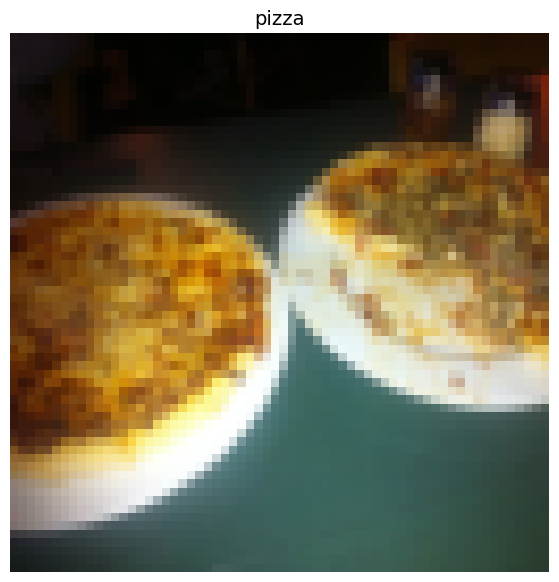

In [17]:
# Sắp xếp lại thứ tự các chiều (dimensions)
img_permute = img.permute(1, 2, 0)

# In ra các hình dạng khác nhau (trước và sau permute)
print(f"Original shape: {img.shape} -> [color_channels, height, width]")
print(f"Image permute shape: {img_permute.shape} -> [height, width, color_channels]")

# Vẽ hình ảnh
plt.figure(figsize=(10, 7))
plt.imshow(img.permute(1, 2, 0))
plt.axis("off")
plt.title(class_names[label], fontsize=14);

Lưu ý rằng hình ảnh hiện tại bị pixelated hơn (chất lượng thấp hơn).

Điều này là do nó được thay đổi kích thước từ `512x512` xuống `64x64` pixel.

Trực giác ở đây là nếu bạn nghĩ rằng hình ảnh khó nhận ra hơn những gì đang diễn ra, thì rất có thể một mô hình (model) cũng sẽ khó hiểu hơn.

### 4.1 Biến các hình ảnh đã tải thành `DataLoader`

Chúng ta đã có hình ảnh dưới dạng `Dataset` của PyTorch nhưng bây giờ hãy biến chúng thành `DataLoader`.

Chúng ta sẽ làm như vậy bằng cách sử dụng [`torch.utils.data.DataLoader`](https://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader).

Biến `Dataset` của chúng ta thành `DataLoader` làm cho chúng có thể lặp lại (iterable) để một mô hình (model) có thể đi qua và học các mối quan hệ giữa các mẫu (samples) và đích (targets) (các đặc trưng - features và nhãn - labels).

Để giữ mọi thứ đơn giản, chúng ta sẽ sử dụng `batch_size=1` và `num_workers=1`.

`num_workers` là gì?

Câu hỏi hay.

Nó định nghĩa có bao nhiêu tiến trình con (subprocesses) sẽ được tạo để tải dữ liệu (data) của bạn.

Hãy nghĩ về nó như thế này, giá trị `num_workers` được đặt càng cao, PyTorch sẽ sử dụng càng nhiều sức mạnh tính toán (compute power) để tải dữ liệu (data) của bạn.

Cá nhân tôi, tôi thường đặt nó bằng tổng số CPU trên máy của tôi thông qua [`os.cpu_count()`](https://docs.python.org/3/library/os.html#os.cpu_count) của Python.

Điều này đảm bảo `DataLoader` tuyển dụng càng nhiều lõi (cores) càng tốt để tải dữ liệu (data).

> **Lưu ý:** Có nhiều tham số (parameters) hơn mà bạn có thể làm quen khi sử dụng `torch.utils.data.DataLoader` trong [tài liệu PyTorch](https://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader).

In [18]:
# Biến Dataset huấn luyện (train) và kiểm tra (test) thành DataLoader
from torch.utils.data import DataLoader
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=1, # bao nhiêu mẫu (samples) mỗi batch?
                              num_workers=1, # bao nhiêu tiến trình con (subprocesses) để sử dụng cho việc tải dữ liệu? (cao hơn = nhiều hơn)
                              shuffle=True) # xáo trộn dữ liệu (shuffle the data)?

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=1,
                             num_workers=1,
                             shuffle=False) # thường không cần xáo trộn dữ liệu kiểm tra (testing data)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x78c55d476110>,
 <torch.utils.data.dataloader.DataLoader at 0x78c55d655d50>)

Tuyệt vời!

Bây giờ dữ liệu (data) của chúng ta có thể lặp lại (iterable).

Hãy thử nó và kiểm tra các hình dạng (shapes).

In [19]:
img, label = next(iter(train_dataloader))

# Kích thước batch (batch size) bây giờ sẽ là 1, thử thay đổi tham số batch_size ở trên và xem điều gì sẽ xảy ra
print(f"Image shape: {img.shape} -> [batch_size, color_channels, height, width]")
print(f"Label shape: {label.shape}")

Image shape: torch.Size([1, 3, 64, 64]) -> [batch_size, color_channels, height, width]
Label shape: torch.Size([1])


Bây giờ chúng ta có thể sử dụng những `DataLoader` này với vòng lặp huấn luyện (training) và kiểm tra (testing) để huấn luyện (train) một mô hình (model).

Nhưng trước khi chúng ta làm điều đó, hãy xem một tùy chọn khác để tải hình ảnh (hoặc hầu hết bất kỳ loại dữ liệu nào khác).

## 5. Tùy chọn 2 (Option 2): Tải dữ liệu hình ảnh với `Dataset` tùy chỉnh (Custom Dataset)

Điều gì sẽ xảy ra nếu một trình tạo `Dataset` được xây dựng sẵn như [`torchvision.datasets.ImageFolder()`](https://pytorch.org/vision/stable/datasets.html#torchvision.datasets.ImageFolder) không tồn tại?

Hoặc một cái dành cho vấn đề cụ thể của bạn không tồn tại?

Vâng, bạn có thể xây dựng của riêng mình.

Nhưng chờ đã, ưu và nhược điểm của việc tạo cách tùy chỉnh (custom) của riêng bạn để tải `Dataset` là gì?

| Ưu điểm của việc tạo `Dataset` tùy chỉnh (custom) | Nhược điểm của việc tạo `Dataset` tùy chỉnh (custom) |
| ----- | ----- |
| Có thể tạo `Dataset` từ hầu hết mọi thứ. | Mặc dù bạn *có thể* tạo `Dataset` từ hầu hết mọi thứ, điều đó không có nghĩa là nó sẽ hoạt động. |
| Không bị giới hạn bởi các hàm `Dataset` được xây dựng sẵn của PyTorch. | Sử dụng `Dataset` tùy chỉnh (custom) thường dẫn đến việc viết nhiều mã (code) hơn, có thể dễ gặp lỗi hoặc vấn đề về hiệu suất (performance). |

Để thấy điều này trong hành động, hãy làm việc hướng tới việc sao chép `torchvision.datasets.ImageFolder()` bằng cách tạo lớp con (subclassing) `torch.utils.data.Dataset` (lớp cơ sở - base class cho tất cả `Dataset` trong PyTorch).

Chúng ta sẽ bắt đầu bằng cách import các module chúng ta cần:
* `os` của Python để xử lý các thư mục (dữ liệu của chúng ta được lưu trữ trong các thư mục).
* `pathlib` của Python để xử lý các đường dẫn tệp (mỗi hình ảnh của chúng ta có một đường dẫn tệp duy nhất).
* `torch` cho tất cả mọi thứ của PyTorch.
* Lớp `Image` của PIL để tải hình ảnh.

In [20]:
import os
import pathlib
import torch

from PIL import Image
from torch.utils.data import Dataset
from torchvision import transforms
from typing import Tuple, Dict, List

Bạn có nhớ các thể hiện (instances) của `torchvision.datasets.ImageFolder()` của chúng ta đã cho phép chúng ta sử dụng các thuộc tính `classes` và `class_to_idx` không?

In [21]:
# Thể hiện (Instance) của torchvision.datasets.ImageFolder()
train_data.classes, train_data.class_to_idx

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

### 5.1 Tạo hàm trợ giúp (helper function) để lấy tên các lớp (class names)

Hãy viết một hàm trợ giúp (helper function) có khả năng tạo danh sách tên các lớp (class names) và một từ điển (dictionary) gồm tên các lớp (class names) và chỉ số (indexes) của chúng được cung cấp một đường dẫn thư mục.

Để làm điều đó, chúng ta sẽ:
1. Lấy tên các lớp (class names) bằng cách sử dụng `os.scandir()` để duyệt qua thư mục đích (lý tưởng nhất là thư mục ở định dạng phân loại hình ảnh tiêu chuẩn).
2. Đưa ra lỗi nếu không tìm thấy tên các lớp (class names) (nếu điều này xảy ra, có thể có gì đó không ổn với cấu trúc thư mục).
3. Biến tên các lớp (class names) thành một từ điển (dictionary) của các nhãn số (numerical labels), một cho mỗi lớp (class).

Hãy xem một ví dụ nhỏ của bước 1 trước khi chúng ta viết hàm đầy đủ.

In [22]:
# Thiết lập đường dẫn cho thư mục đích (target directory)
target_directory = train_dir
print(f"Target directory: {target_directory}")

# Lấy tên các lớp (class names) từ thư mục đích (target directory)
class_names_found = sorted([entry.name for entry in list(os.scandir(image_path / "train"))])
print(f"Class names found: {class_names_found}")

Target directory: data/pizza_steak_sushi/train
Class names found: ['pizza', 'steak', 'sushi']


Tuyệt vời!

Còn việc biến nó thành một hàm (function) đầy đủ thì sao?

In [23]:
# Tạo hàm để tìm các lớp (classes) trong thư mục đích (target directory)
def find_classes(directory: str) -> Tuple[List[str], Dict[str, int]]:
    """Tìm tên các thư mục lớp (class folder names) trong thư mục đích (target directory).

    Giả định thư mục đích (target directory) ở định dạng phân loại hình ảnh tiêu chuẩn.

    Args:
        directory (str): thư mục đích để tải tên các lớp (classnames) từ đó.

    Returns:
        Tuple[List[str], Dict[str, int]]: (list_of_class_names, dict(class_name: idx...))

    Example:
        find_classes("food_images/train")
        >>> (["class_1", "class_2"], {"class_1": 0, ...})
    """
    # 1. Lấy tên các lớp (class names) bằng cách quét thư mục đích (target directory)
    classes = sorted(entry.name for entry in os.scandir(directory) if entry.is_dir())

    # 2. Đưa ra lỗi nếu không tìm thấy tên các lớp (class names)
    if not classes:
        raise FileNotFoundError(f"Couldn't find any classes in {directory}.")

    # 3. Tạo một từ điển (dictionary) của các nhãn chỉ số (index labels) (máy tính thích nhãn số hơn nhãn chuỗi)
    class_to_idx = {cls_name: i for i, cls_name in enumerate(classes)}
    return classes, class_to_idx

Trông tốt!

Bây giờ hãy thử nghiệm hàm `find_classes()` của chúng ta.

In [24]:
find_classes(train_dir)

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

Woohoo! Trông tốt!

### 5.2 Tạo `Dataset` tùy chỉnh (custom) để sao chép `ImageFolder`

Bây giờ chúng ta đã sẵn sàng xây dựng `Dataset` tùy chỉnh (custom) của riêng mình.

Chúng ta sẽ xây dựng một cái để sao chép chức năng của `torchvision.datasets.ImageFolder()`.

Đây sẽ là thực hành tốt, thêm vào đó, nó sẽ tiết lộ một số bước cần thiết để tạo `Dataset` tùy chỉnh (custom) của riêng bạn.

Sẽ có khá nhiều mã (code)... nhưng không có gì chúng ta không thể xử lý được!

Hãy chia nhỏ nó ra:
1. Tạo lớp con (subclass) `torch.utils.data.Dataset`.
2. Khởi tạo lớp con (subclass) của chúng ta với tham số `targ_dir` (thư mục dữ liệu đích - target data directory) và tham số `transform` (để chúng ta có tùy chọn biến đổi dữ liệu của mình nếu cần).
3. Tạo một số thuộc tính (attributes) cho `paths` (đường dẫn của hình ảnh đích), `transform` (các biến đổi chúng ta có thể muốn sử dụng, điều này có thể là `None`), `classes` và `class_to_idx` (từ hàm `find_classes()` của chúng ta).
4. Tạo một hàm để tải hình ảnh từ tệp và trả về chúng, điều này có thể sử dụng `PIL` hoặc [`torchvision.io`](https://pytorch.org/vision/stable/io.html#image) (cho input/output của dữ liệu thị giác - vision data).
5. Ghi đè (overwrite) phương thức `__len__` của `torch.utils.data.Dataset` để trả về số lượng mẫu (samples) trong `Dataset`, điều này được khuyến nghị nhưng không bắt buộc. Điều này để bạn có thể gọi `len(Dataset)`.

In [25]:
# Viết một lớp dataset tùy chỉnh (custom dataset class) (kế thừa từ torch.utils.data.Dataset)
from torch.utils.data import Dataset

# 1. Tạo lớp con (subclass) torch.utils.data.Dataset
class ImageFolderCustom(Dataset):

    # 2. Khởi tạo với tham số targ_dir và transform (tùy chọn)
    def __init__(self, targ_dir: str, transform=None) -> None:

        # 3. Tạo các thuộc tính lớp (class attributes)
        # Lấy tất cả đường dẫn hình ảnh
        self.paths = list(pathlib.Path(targ_dir).glob("*/*.jpg")) # lưu ý: bạn sẽ phải cập nhật điều này nếu bạn có .png hoặc .jpeg
        # Thiết lập các biến đổi (transforms)
        self.transform = transform
        # Tạo các thuộc tính classes và class_to_idx
        self.classes, self.class_to_idx = find_classes(targ_dir)

    # 4. Tạo hàm để tải hình ảnh
    def load_image(self, index: int) -> Image.Image:
        "Mở một hình ảnh thông qua đường dẫn và trả về nó."
        image_path = self.paths[index]
        return Image.open(image_path)

    # 5. Ghi đè phương thức __len__() (tùy chọn nhưng được khuyến nghị cho các lớp con của torch.utils.data.Dataset)
    def __len__(self) -> int:
        "Trả về tổng số mẫu (samples)."
        return len(self.paths)

    # 6. Ghi đè phương thức __getitem__() (bắt buộc cho các lớp con của torch.utils.data.Dataset)
    def __getitem__(self, index: int) -> Tuple[torch.Tensor, int]:
        "Trả về một mẫu dữ liệu (sample of data), dữ liệu và nhãn (data and label) (X, y)."
        img = self.load_image(index)
        class_name  = self.paths[index].parent.name # mong đợi đường dẫn trong data_folder/class_name/image.jpeg
        class_idx = self.class_to_idx[class_name]

        # Biến đổi nếu cần thiết
        if self.transform:
            return self.transform(img), class_idx # trả về dữ liệu, nhãn (data, label) (X, y)
        else:
            return img, class_idx # trả về dữ liệu, nhãn (data, label) (X, y)

Woah! Rất nhiều mã (code) để tải hình ảnh của chúng ta.

Đây là một trong những nhược điểm của việc tạo `Dataset` tùy chỉnh (custom) của riêng bạn.

Tuy nhiên, bây giờ chúng ta đã viết nó một lần, chúng ta có thể chuyển nó vào một tệp `.py` như `data_loader.py` cùng với một số hàm dữ liệu hữu ích khác và sử dụng lại sau này.

Trước khi chúng ta thử nghiệm lớp `ImageFolderCustom` mới của mình, hãy tạo một số biến đổi (transforms) để chuẩn bị hình ảnh của chúng ta.

In [26]:
# Tăng cường dữ liệu huấn luyện (augment train data)
train_transforms = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])

# Không tăng cường dữ liệu kiểm tra (test data), chỉ thay đổi hình dạng (reshape)
test_transforms = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor()
])

Bây giờ là khoảnh khắc quyết định!

Hãy biến hình ảnh huấn luyện (training images) của chúng ta (chứa trong `train_dir`) và hình ảnh kiểm tra (testing images) của chúng ta (chứa trong `test_dir`) thành `Dataset` bằng cách sử dụng lớp `ImageFolderCustom` của riêng chúng ta.

In [27]:
train_data_custom = ImageFolderCustom(targ_dir=train_dir,
                                      transform=train_transforms)
test_data_custom = ImageFolderCustom(targ_dir=test_dir,
                                     transform=test_transforms)
train_data_custom, test_data_custom

(<__main__.ImageFolderCustom at 0x78c55d5f7790>,
 <__main__.ImageFolderCustom at 0x78c55d605a90>)

Hmm... không có lỗi, nó có hoạt động không?

Hãy thử gọi `len()` trên `Dataset` mới của chúng ta và tìm các thuộc tính `classes` và `class_to_idx`.

In [28]:
len(train_data_custom), len(test_data_custom)

(225, 75)

In [29]:
train_data_custom.classes

['pizza', 'steak', 'sushi']

In [30]:
train_data_custom.class_to_idx

{'pizza': 0, 'steak': 1, 'sushi': 2}

`len(test_data_custom) == len(test_data)` và `len(test_data_custom) == len(test_data)` Có!!!

Có vẻ như nó đã hoạt động.

Chúng ta cũng có thể kiểm tra sự bằng nhau với `Dataset` được tạo bởi lớp `torchvision.datasets.ImageFolder()`.

In [31]:
# Kiểm tra sự bằng nhau giữa Dataset tùy chỉnh (custom) và ImageFolder Dataset của chúng ta
print((len(train_data_custom) == len(train_data)) & (len(test_data_custom) == len(test_data)))
print(train_data_custom.classes == train_data.classes)
print(train_data_custom.class_to_idx == train_data.class_to_idx)

True
True
True


Ho ho!

Nhìn chúng ta tiến bộ!

Ba `True`!

Bạn không thể có gì tốt hơn thế.

Còn việc chúng ta nâng nó lên một tầm cao mới và vẽ một số hình ảnh ngẫu nhiên để kiểm tra việc ghi đè `__getitem__` của chúng ta thì sao?

### 5.3 Tạo hàm để hiển thị hình ảnh ngẫu nhiên

Bạn biết bây giờ là lúc nào!

Đã đến lúc đội mũ nhà khám phá dữ liệu (data explorer) của chúng ta và *trực quan hóa, trực quan hóa, trực quan hóa!*

Hãy tạo một hàm trợ giúp (helper function) có tên `display_random_images()` giúp chúng ta trực quan hóa hình ảnh trong `Dataset` của chúng ta.

Cụ thể, nó sẽ:
1. Nhận vào một `Dataset` và một số tham số khác như `classes` (tên của các lớp đích - target classes), số lượng hình ảnh để hiển thị (`n`) và một random seed.
2. Để ngăn việc hiển thị trở nên mất kiểm soát, chúng ta sẽ giới hạn `n` ở 10 hình ảnh.
3. Đặt random seed để có các biểu đồ có thể tái tạo (nếu `seed` được đặt).
4. Lấy danh sách các chỉ số mẫu ngẫu nhiên (chúng ta có thể sử dụng `random.sample()` của Python cho việc này) để vẽ.
5. Thiết lập một biểu đồ `matplotlib`.
6. Lặp qua các chỉ số mẫu ngẫu nhiên được tìm thấy ở bước 4 và vẽ chúng với `matplotlib`.
7. Đảm bảo các hình ảnh mẫu có hình dạng `HWC` (height, width, color channels) để chúng ta có thể vẽ chúng.

In [32]:
# 1. Nhận vào một Dataset cũng như danh sách tên các lớp (class names)
def display_random_images(dataset: torch.utils.data.dataset.Dataset,
                          classes: List[str] = None,
                          n: int = 10,
                          display_shape: bool = True,
                          seed: int = None):

    # 2. Điều chỉnh hiển thị nếu n quá cao
    if n > 10:
        n = 10
        display_shape = False
        print(f"For display purposes, n shouldn't be larger than 10, setting to 10 and removing shape display.")

    # 3. Đặt random seed
    if seed:
        random.seed(seed)

    # 4. Lấy các chỉ số mẫu ngẫu nhiên (random sample indexes)
    random_samples_idx = random.sample(range(len(dataset)), k=n)

    # 5. Thiết lập biểu đồ (setup plot)
    plt.figure(figsize=(16, 8))

    # 6. Lặp qua các mẫu và hiển thị các mẫu ngẫu nhiên
    for i, targ_sample in enumerate(random_samples_idx):
        targ_image, targ_label = dataset[targ_sample][0], dataset[targ_sample][1]

        # 7. Điều chỉnh hình dạng tensor hình ảnh để vẽ: [color_channels, height, width] -> [color_channels, height, width]
        targ_image_adjust = targ_image.permute(1, 2, 0)

        # Vẽ các mẫu đã điều chỉnh
        plt.subplot(1, n, i+1)
        plt.imshow(targ_image_adjust)
        plt.axis("off")
        if classes:
            title = f"class: {classes[targ_label]}"
            if display_shape:
                title = title + f"\nshape: {targ_image_adjust.shape}"
        plt.title(title)

Một hàm (function) trông rất tốt!

Hãy thử nghiệm nó trước với `Dataset` mà chúng ta đã tạo bằng `torchvision.datasets.ImageFolder()`.

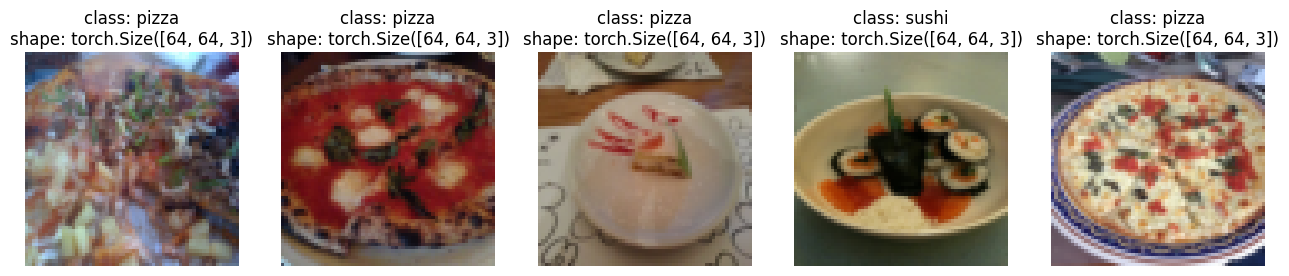

In [33]:
# Hiển thị hình ảnh ngẫu nhiên từ Dataset được tạo bởi ImageFolder
display_random_images(train_data,
                      n=5,
                      classes=class_names,
                      seed=None)

Và bây giờ với `Dataset` mà chúng ta đã tạo bằng `ImageFolderCustom` của riêng chúng ta.

For display purposes, n shouldn't be larger than 10, setting to 10 and removing shape display.


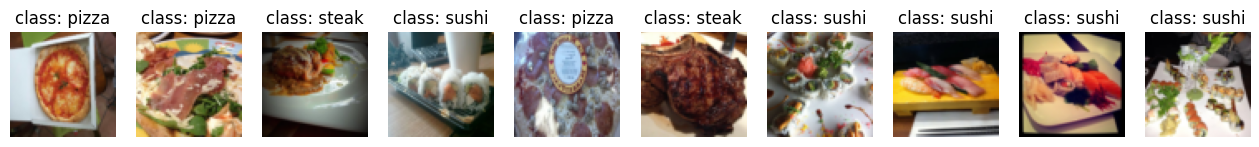

In [34]:
# Hiển thị hình ảnh ngẫu nhiên từ ImageFolderCustom Dataset
display_random_images(train_data_custom,
                      n=12,
                      classes=class_names,
                      seed=None) # Thử đặt seed để có hình ảnh có thể tái tạo

Tuyệt!!!

Có vẻ như `ImageFolderCustom` của chúng ta đang hoạt động đúng như chúng ta muốn.

### 5.4 Biến hình ảnh được tải tùy chỉnh (custom loaded images) thành `DataLoader`

Chúng ta đã có cách để biến hình ảnh thô (raw images) của chúng ta thành `Dataset` (các đặc trưng được ánh xạ tới nhãn hoặc `X` được ánh xạ tới `y`) thông qua lớp `ImageFolderCustom` của chúng ta.

Bây giờ làm thế nào chúng ta có thể biến `Dataset` tùy chỉnh (custom) của chúng ta thành `DataLoader`?

Nếu bạn đoán bằng cách sử dụng `torch.utils.data.DataLoader()`, bạn đã đúng!

Bởi vì `Dataset` tùy chỉnh (custom) của chúng ta là lớp con (subclass) của `torch.utils.data.Dataset`, chúng ta có thể sử dụng chúng trực tiếp với `torch.utils.data.DataLoader()`.

Và chúng ta có thể làm điều đó bằng cách sử dụng các bước rất tương tự như trước đây ngoại trừ lần này chúng ta sẽ sử dụng `Dataset` được tạo tùy chỉnh (custom created) của chúng ta.

In [35]:
# Biến Dataset tùy chỉnh (custom) train và test thành DataLoader
from torch.utils.data import DataLoader
train_dataloader_custom = DataLoader(dataset=train_data_custom, # sử dụng Dataset train được tạo tùy chỉnh
                                     batch_size=1, # bao nhiêu mẫu (samples) mỗi batch?
                                     num_workers=0, # bao nhiêu tiến trình con (subprocesses) để sử dụng cho việc tải dữ liệu? (cao hơn = nhiều hơn)
                                     shuffle=True) # xáo trộn dữ liệu (shuffle the data)?

test_dataloader_custom = DataLoader(dataset=test_data_custom, # sử dụng Dataset test được tạo tùy chỉnh
                                    batch_size=1,
                                    num_workers=0,
                                    shuffle=False) # thường không cần xáo trộn dữ liệu kiểm tra (testing data)

train_dataloader_custom, test_dataloader_custom

(<torch.utils.data.dataloader.DataLoader at 0x78c55d253390>,
 <torch.utils.data.dataloader.DataLoader at 0x78c55d51c350>)

Các hình dạng (shapes) của các mẫu (samples) có giống nhau không?

In [36]:
# Lấy hình ảnh và nhãn (label) từ DataLoader tùy chỉnh (custom)
img_custom, label_custom = next(iter(train_dataloader_custom))

# Kích thước batch (batch size) bây giờ sẽ là 1, thử thay đổi tham số batch_size ở trên và xem điều gì sẽ xảy ra
print(f"Image shape: {img_custom.shape} -> [batch_size, color_channels, height, width]")
print(f"Label shape: {label_custom.shape}")

Image shape: torch.Size([1, 3, 64, 64]) -> [batch_size, color_channels, height, width]
Label shape: torch.Size([1])


Chúng chắc chắn giống nhau!

Bây giờ hãy xem xét một số hình thức biến đổi dữ liệu (data transforms) khác.

## 6. Các hình thức biến đổi dữ liệu khác (data augmentation)

Chúng ta đã thấy một vài phép biến đổi (transforms) trên dữ liệu của mình rồi nhưng còn nhiều loại khác nữa.

Bạn có thể xem tất cả trong [tài liệu `torchvision.transforms`](https://pytorch.org/vision/stable/transforms.html).

Mục đích của các phép biến đổi (transforms) là để thay đổi hình ảnh của bạn theo một cách nào đó.

Điều đó có thể là chuyển đổi hình ảnh của bạn thành tensor (như chúng ta đã thấy trước đây).

Hoặc cắt ảnh hoặc xóa ngẫu nhiên một phần hoặc xoay ngẫu nhiên chúng.

Việc thực hiện các loại biến đổi này thường được gọi là **tăng cường dữ liệu (data augmentation)**.

**Tăng cường dữ liệu (Data augmentation)** là quá trình thay đổi dữ liệu của bạn theo cách mà bạn *nhân tạo* tăng tính đa dạng của tập huấn luyện (training set).

Huấn luyện (training) một mô hình trên tập dữ liệu (dataset) được thay đổi *nhân tạo* này hy vọng sẽ tạo ra một mô hình có khả năng *tổng quát hóa (generalization)* tốt hơn (các mẫu mà nó học được sẽ mạnh mẽ hơn đối với các ví dụ chưa thấy trong tương lai).

Bạn có thể xem nhiều ví dụ khác nhau về tăng cường dữ liệu (data augmentation) được thực hiện trên hình ảnh bằng cách sử dụng `torchvision.transforms` trong [ví dụ Illustration of Transforms](https://pytorch.org/vision/main/auto_examples/transforms/plot_transforms_illustrations.html) của PyTorch.

Nhưng chúng ta hãy thử một cái.

Học máy (Machine learning) là tất cả về việc khai thác sức mạnh của tính ngẫu nhiên và nghiên cứu cho thấy rằng các phép biến đổi ngẫu nhiên (như [`transforms.RandAugment()`](https://pytorch.org/vision/stable/auto_examples/plot_transforms.html#randaugment) và [`transforms.TrivialAugmentWide()`](https://pytorch.org/vision/stable/auto_examples/plot_transforms.html#trivialaugmentwide)) thường hoạt động tốt hơn so với các phép biến đổi được chọn thủ công.

Ý tưởng đằng sau [TrivialAugment](https://arxiv.org/abs/2103.10158) là... tầm thường.

Bạn có một tập hợp các phép biến đổi (transforms) và bạn chọn ngẫu nhiên một số trong số chúng để thực hiện trên một hình ảnh và với cường độ ngẫu nhiên trong một phạm vi nhất định (cường độ cao hơn có nghĩa là mạnh mẽ hơn).

Nhóm PyTorch thậm chí đã [sử dụng TrivialAugment để huấn luyện (training) các mô hình thị giác (vision models) hiện đại nhất của họ](https://pytorch.org/blog/how-to-train-state-of-the-art-models-using-torchvision-latest-primitives/#break-down-of-key-accuracy-improvements).

![trivial augment data augmentation being used for PyTorch state of the art training](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/04-trivial-augment-being-using-in-PyTorch-resize.png)

*TrivialAugment là một trong những thành phần được sử dụng trong việc nâng cấp huấn luyện (training) hiện đại gần đây cho các mô hình thị giác PyTorch khác nhau.*

Chúng ta hãy thử nghiệm nó trên một số hình ảnh của riêng chúng ta?

Tham số chính cần chú ý trong `transforms.TrivialAugmentWide()` là `num_magnitude_bins=31`.

Nó xác định phạm vi của giá trị cường độ sẽ được chọn để áp dụng một phép biến đổi (transform) nhất định, `0` là không có phạm vi và `31` là phạm vi tối đa (cơ hội cao nhất cho cường độ cao nhất).

Chúng ta có thể kết hợp `transforms.TrivialAugmentWide()` vào `transforms.Compose()`.

In [37]:
from torchvision import transforms

train_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.TrivialAugmentWide(num_magnitude_bins=31), # mức độ mạnh mẽ (how intense)
    transforms.ToTensor() # sử dụng ToTensor() cuối cùng để có mọi thứ giữa 0 & 1 (use ToTensor() last to get everything between 0 & 1)
])

# Không cần thực hiện tăng cường dữ liệu (augmentation) trên dữ liệu test (Don't need to perform augmentation on the test data)
test_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

> **Lưu ý:** Bạn thường không thực hiện tăng cường dữ liệu (data augmentation) trên tập test. Ý tưởng của tăng cường dữ liệu (data augmentation) là *nhân tạo* tăng tính đa dạng của tập huấn luyện (training set) để dự đoán tốt hơn trên tập test.
>
> Tuy nhiên, bạn cần đảm bảo rằng hình ảnh tập test được chuyển đổi thành tensors. Chúng ta cũng thay đổi kích thước hình ảnh test về cùng kích thước với hình ảnh huấn luyện (training), tuy nhiên, suy luận (inference) có thể được thực hiện trên các hình ảnh có kích thước khác nhau nếu cần thiết (mặc dù điều này có thể thay đổi hiệu suất).

Tuyệt vời, bây giờ chúng ta đã có một phép biến đổi huấn luyện (training transform) (với tăng cường dữ liệu) và phép biến đổi test (test transform) (không có tăng cường dữ liệu).

Hãy thử nghiệm tăng cường dữ liệu của chúng ta!

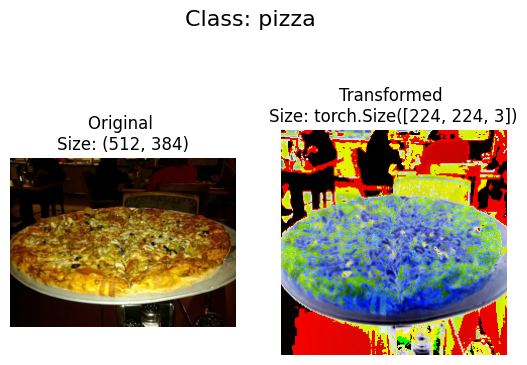

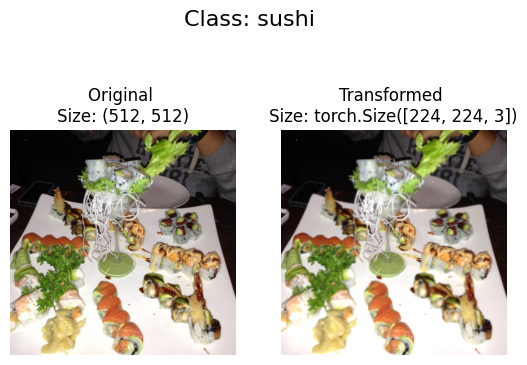

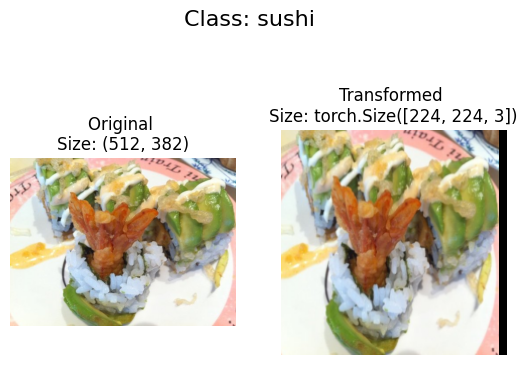

In [38]:
# Lấy tất cả đường dẫn hình ảnh (Get all image paths)
image_path_list = list(image_path.glob("*/*/*.jpg"))

# Vẽ hình ảnh ngẫu nhiên (Plot random images)
plot_transformed_images(
    image_paths=image_path_list,
    transform=train_transforms,
    n=3,
    seed=None
)

Hãy thử chạy ô (cell) ở trên vài lần và xem hình ảnh gốc thay đổi như thế nào khi nó đi qua phép biến đổi (transform).

## 7. Mô hình 0: TinyVGG không có tăng cường dữ liệu (data augmentation)

Được rồi, chúng ta đã thấy cách chuyển đổi dữ liệu từ hình ảnh trong thư mục thành tensors đã được biến đổi.

Bây giờ hãy xây dựng một mô hình thị giác máy tính (computer vision model) để xem liệu chúng ta có thể phân loại hình ảnh là pizza, steak hay sushi hay không.

Để bắt đầu, chúng ta sẽ bắt đầu với một phép biến đổi đơn giản, chỉ thay đổi kích thước hình ảnh thành `(64, 64)` và chuyển chúng thành tensors.

### 7.1 Tạo transforms và tải dữ liệu cho Mô hình 0

In [39]:
# Tạo phép biến đổi đơn giản (Create simple transform)
simple_transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor(),
])

Tuyệt vời, bây giờ chúng ta đã có một phép biến đổi đơn giản, hãy:
1. Tải dữ liệu, chuyển đổi từng thư mục huấn luyện (training) và test trước tiên thành một `Dataset` với `torchvision.datasets.ImageFolder()`
2. Sau đó thành một `DataLoader` bằng cách sử dụng `torch.utils.data.DataLoader()`.
    * Chúng ta sẽ đặt `batch_size=32` và `num_workers` bằng số CPU trên máy của chúng ta (điều này sẽ phụ thuộc vào máy bạn đang sử dụng).

In [40]:
# 1. Tải và biến đổi dữ liệu (Load and transform data)
from torchvision import datasets
train_data_simple = datasets.ImageFolder(root=train_dir, transform=simple_transform)
test_data_simple = datasets.ImageFolder(root=test_dir, transform=simple_transform)

# 2. Chuyển dữ liệu thành DataLoaders (Turn data into DataLoaders)
import os
from torch.utils.data import DataLoader

# Thiết lập kích thước batch và số workers (Setup batch size and number of workers)
BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()
print(f"Creating DataLoader's with batch size {BATCH_SIZE} and {NUM_WORKERS} workers.")

# Tạo DataLoader's (Create DataLoader's)
train_dataloader_simple = DataLoader(train_data_simple,
                                     batch_size=BATCH_SIZE,
                                     shuffle=True,
                                     num_workers=NUM_WORKERS)

test_dataloader_simple = DataLoader(test_data_simple,
                                    batch_size=BATCH_SIZE,
                                    shuffle=False,
                                    num_workers=NUM_WORKERS)

train_dataloader_simple, test_dataloader_simple

Creating DataLoader's with batch size 32 and 2 workers.


(<torch.utils.data.dataloader.DataLoader at 0x78c55cfb58d0>,
 <torch.utils.data.dataloader.DataLoader at 0x78c55d3f2250>)

`DataLoader`'s đã được tạo!

Hãy xây dựng một mô hình.

### 7.2 Tạo lớp mô hình TinyVGG

Trong [notebook 03](https://www.learnpytorch.io/03_pytorch_computer_vision/#7-model-2-building-a-convolutional-neural-network-cnn), chúng ta đã sử dụng mô hình TinyVGG từ [trang web CNN Explainer](https://poloclub.github.io/cnn-explainer/).

Hãy tạo lại cùng một mô hình, ngoại trừ lần này chúng ta sẽ sử dụng hình ảnh màu thay vì thang độ xám (`in_channels=3` thay vì `in_channels=1` cho các pixel RGB).

In [41]:
class TinyVGG(nn.Module):
    """
    Kiến trúc mô hình sao chép TinyVGG từ:
    https://poloclub.github.io/cnn-explainer/
    (Model architecture copying TinyVGG from:
    https://poloclub.github.io/cnn-explainer/)
    """
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int) -> None:
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                      out_channels=hidden_units,
                      kernel_size=3, # hình vuông đi qua hình ảnh lớn như thế nào? (how big is the square that's going over the image?)
                      stride=1, # mặc định (default)
                      padding=1), # tùy chọn = "valid" (không padding) hoặc "same" (đầu ra có cùng hình dạng với đầu vào) hoặc int cho số cụ thể (options = "valid" (no padding) or "same" (output has same shape as input) or int for specific number)
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                         stride=2) # giá trị stride mặc định giống với kernel_size (default stride value is same as kernel_size)
        )
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(hidden_units, hidden_units, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(hidden_units, hidden_units, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            # Hình dạng in_features này đến từ đâu? (Where did this in_features shape come from?)
            # Đó là bởi vì mỗi lớp của mạng chúng ta nén và thay đổi hình dạng của dữ liệu đầu vào. (It's because each layer of our network compresses and changes the shape of our input data.)
            nn.Linear(in_features=hidden_units*16*16,
                      out_features=output_shape)
        )

    def forward(self, x: torch.Tensor):
        x = self.conv_block_1(x)
        # print(x.shape)
        x = self.conv_block_2(x)
        # print(x.shape)
        x = self.classifier(x)
        # print(x.shape)
        return x
        # return self.classifier(self.conv_block_2(self.conv_block_1(x))) # <- tận dụng lợi ích của operator fusion (leverage the benefits of operator fusion)

torch.manual_seed(42)
model_0 = TinyVGG(input_shape=3, # số kênh màu (3 cho RGB) (number of color channels (3 for RGB))
                  hidden_units=10,
                  output_shape=len(train_data.classes)).to(device)
model_0

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=2560, out_features=3, bias=True)
  )
)

> **Lưu ý:** Một trong những cách để tăng tốc tính toán mô hình học sâu (deep learning) trên GPU là tận dụng **operator fusion**.
>
> Điều này có nghĩa là trong phương thức `forward()` trong mô hình của chúng ta ở trên, thay vì gọi một khối lớp (layer block) và gán lại `x` mỗi lần, chúng ta gọi từng khối liên tiếp (xem dòng cuối cùng của phương thức `forward()` trong mô hình ở trên để có ví dụ).
>
> Điều này tiết kiệm thời gian dành cho việc gán lại `x` (tốn nhiều bộ nhớ) và chỉ tập trung vào việc tính toán trên `x`.
>
> Xem [*Making Deep Learning Go Brrrr From First Principles*](https://horace.io/brrr_intro.html) của Horace He để biết thêm các cách tăng tốc mô hình học máy (machine learning).

Bây giờ đó là một mô hình trông đẹp!

Chúng ta hãy thử nghiệm nó với một lần forward pass trên một hình ảnh duy nhất?

### 7.3 Thử forward pass trên một hình ảnh duy nhất (để kiểm tra mô hình)

Một cách tốt để kiểm tra mô hình là thực hiện forward pass trên một phần dữ liệu duy nhất.

Đây cũng là cách hữu ích để kiểm tra hình dạng đầu vào và đầu ra của các lớp khác nhau.

Để thực hiện forward pass trên một hình ảnh duy nhất, hãy:
1. Lấy một batch hình ảnh và nhãn từ `DataLoader`.
2. Lấy một hình ảnh duy nhất từ batch và `unsqueeze()` hình ảnh để nó có kích thước batch là `1` (để hình dạng của nó phù hợp với mô hình).
3. Thực hiện suy luận (inference) trên một hình ảnh duy nhất (đảm bảo gửi hình ảnh đến `device` đích).
4. In ra những gì đang xảy ra và chuyển đổi logits đầu ra thô của mô hình thành xác suất dự đoán với `torch.softmax()` (vì chúng ta đang làm việc với dữ liệu đa lớp) và chuyển đổi xác suất dự đoán thành nhãn dự đoán với `torch.argmax()`.

In [42]:
# 1. Lấy một batch hình ảnh và nhãn từ DataLoader (Get a batch of images and labels from the DataLoader)
img_batch, label_batch = next(iter(train_dataloader_simple))

# 2. Lấy một hình ảnh duy nhất từ batch và unsqueeze hình ảnh để hình dạng của nó phù hợp với mô hình (Get a single image from the batch and unsqueeze the image so its shape fits the model)
img_single, label_single = img_batch[0].unsqueeze(dim=0), label_batch[0]
print(f"Single image shape: {img_single.shape}\n")

# 3. Thực hiện forward pass trên một hình ảnh duy nhất (Perform a forward pass on a single image)
model_0.eval()
with torch.inference_mode():
    pred = model_0(img_single.to(device))

# 4. In ra những gì đang xảy ra và chuyển đổi logits mô hình -> xác suất dự đoán -> nhãn dự đoán (Print out what's happening and convert model logits -> pred probs -> pred label)
print(f"Output logits:\n{pred}\n")
print(f"Output prediction probabilities:\n{torch.softmax(pred, dim=1)}\n")
print(f"Output prediction label:\n{torch.argmax(torch.softmax(pred, dim=1), dim=1)}\n")
print(f"Actual label:\n{label_single}")

Single image shape: torch.Size([1, 3, 64, 64])

Output logits:
tensor([[0.0578, 0.0634, 0.0351]])

Output prediction probabilities:
tensor([[0.3352, 0.3371, 0.3277]])

Output prediction label:
tensor([1])

Actual label:
2


Tuyệt vời, có vẻ như mô hình của chúng ta đang xuất ra những gì chúng ta mong đợi.

Và bạn có thể sẽ nhận thấy các dự đoán thường sai.

Điều này là có thể mong đợi được vì mô hình chưa được huấn luyện (trained) và về cơ bản nó đang đoán bằng cách sử dụng các trọng số ngẫu nhiên.

### 7.4 Sử dụng `torchinfo` để hiểu về các hình dạng đi qua mô hình của chúng ta

In mô hình của chúng ta với `print(model)` cho chúng ta ý tưởng về những gì đang xảy ra với mô hình.

Và chúng ta có thể in ra các hình dạng của dữ liệu trong suốt phương thức `forward()`.

Tuy nhiên, một cách hữu ích để lấy thông tin từ mô hình của chúng ta là sử dụng [`torchinfo`](https://github.com/TylerYep/torchinfo).

`torchinfo` đi kèm với một phương thức `summary()` nhận một mô hình PyTorch cũng như một `input_shape` và trả về những gì xảy ra khi một tensor di chuyển qua mô hình của bạn.

> **Lưu ý:** Nếu bạn đang sử dụng Google Colab, bạn sẽ cần cài đặt `torchinfo`.

In [43]:
# Cài đặt torchinfo nếu nó không có sẵn, import nó nếu có (Install torchinfo if it's not available, import it if it is)
try:
    import torchinfo
except:
    %pip install torchinfo
    import torchinfo

from torchinfo import summary
summary(model_0, input_size=[1, 3, 64, 64]) # thực hiện một lần test pass qua với kích thước đầu vào ví dụ (do a test pass through of an example input size)

Layer (type:depth-idx)                   Output Shape              Param #
TinyVGG                                  [1, 3]                    --
├─Sequential: 1-1                        [1, 10, 32, 32]           --
│    └─Conv2d: 2-1                       [1, 10, 64, 64]           280
│    └─ReLU: 2-2                         [1, 10, 64, 64]           --
│    └─Conv2d: 2-3                       [1, 10, 64, 64]           910
│    └─ReLU: 2-4                         [1, 10, 64, 64]           --
│    └─MaxPool2d: 2-5                    [1, 10, 32, 32]           --
├─Sequential: 1-2                        [1, 10, 16, 16]           --
│    └─Conv2d: 2-6                       [1, 10, 32, 32]           910
│    └─ReLU: 2-7                         [1, 10, 32, 32]           --
│    └─Conv2d: 2-8                       [1, 10, 32, 32]           910
│    └─ReLU: 2-9                         [1, 10, 32, 32]           --
│    └─MaxPool2d: 2-10                   [1, 10, 16, 16]           --
├─Sequentia

Tuyệt vời!

Đầu ra của `torchinfo.summary()` cung cấp cho chúng ta rất nhiều thông tin về mô hình.

Chẳng hạn như `Total params`, tổng số tham số trong mô hình của chúng ta, `Estimated Total Size (MB)` là kích thước của mô hình.

Bạn cũng có thể thấy sự thay đổi trong hình dạng đầu vào và đầu ra khi dữ liệu có `input_size` nhất định di chuyển qua mô hình của chúng ta.

Hiện tại, số lượng tham số và tổng kích thước mô hình của chúng ta thấp.

Điều này là do chúng ta đang bắt đầu với một mô hình nhỏ.

Và nếu chúng ta cần tăng kích thước của nó sau này, chúng ta có thể.

### 7.5 Tạo các hàm vòng lặp huấn luyện và test

Chúng ta đã có dữ liệu và chúng ta đã có mô hình.

Bây giờ hãy tạo một số hàm vòng lặp huấn luyện (training) và test để huấn luyện (train) mô hình của chúng ta trên dữ liệu huấn luyện (training data) và đánh giá mô hình của chúng ta trên dữ liệu test.

Và để đảm bảo chúng ta có thể sử dụng lại các vòng lặp huấn luyện (training) và test này, chúng ta sẽ chuyển chúng thành hàm.

Cụ thể, chúng ta sẽ tạo ba hàm:
1. `train_step()` - nhận vào một mô hình, một `DataLoader`, một hàm mất mát (loss function) và một optimizer và huấn luyện (trains) mô hình trên `DataLoader`.
2. `test_step()` - nhận vào một mô hình, một `DataLoader` và một hàm mất mát (loss function) và đánh giá mô hình trên `DataLoader`.
3. `train()` - thực hiện 1. và 2. cùng nhau trong một số epochs nhất định và trả về một từ điển kết quả.

> **Lưu ý:** Chúng ta đã đề cập đến các bước trong vòng lặp tối ưu hóa PyTorch trong [notebook 01](https://www.learnpytorch.io/01_pytorch_workflow/#creating-an-optimization-loop-in-pytorch), cũng như [Unofficial PyTorch Optimization Loop Song](https://youtu.be/Nutpusq_AFw) và chúng ta đã xây dựng các hàm tương tự trong [notebook 03](https://www.learnpytorch.io/03_pytorch_computer_vision/#62-functionizing-training-and-test-loops).

Hãy bắt đầu bằng cách xây dựng `train_step()`.

Vì chúng ta đang xử lý các batches trong `DataLoader`'s, chúng ta sẽ tích lũy các giá trị mất mát (loss) và độ chính xác (accuracy) của mô hình trong quá trình huấn luyện (training) (bằng cách cộng chúng lại cho từng batch) và sau đó điều chỉnh chúng ở cuối trước khi chúng ta trả về chúng.

In [44]:
from tqdm.auto import tqdm

def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer):

    print("Train step...")

    # Đặt mô hình ở chế độ train (Put model in train mode)
    model.train()

    # Thiết lập giá trị train loss và train accuracy (Setup train loss and train accuracy values)
    train_loss, train_acc = 0, 0

    # Lặp qua các batches dữ liệu của data loader (Loop through data loader data batches)
    for (X, y) in tqdm(dataloader):
        # Gửi dữ liệu đến target device (Send data to target device)
        X, y = X.to(device), y.to(device)

        # 1. Forward pass
        y_pred = model(X)

        # 2. Tính toán và tích lũy loss (Calculate and accumulate loss)
        loss = loss_fn(y_pred, y)
        train_loss += loss.item()

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

        # Tính toán và tích lũy các metrics accuracy qua tất cả batches (Calculate and accumulate accuracy metrics across all batches)
        y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
        train_acc += (y_pred_class == y).sum().item()/len(y_pred)

    # Điều chỉnh metrics để có loss và accuracy trung bình mỗi batch (Adjust metrics to get average loss and accuracy per batch)
    train_loss = train_loss / len(dataloader)
    train_acc = train_acc / len(dataloader)
    return train_loss, train_acc

Woohoo! Hàm `train_step()` hoàn thành.

Bây giờ hãy làm tương tự cho hàm `test_step()`.

Sự khác biệt chính ở đây là `test_step()` sẽ không nhận vào một optimizer và do đó sẽ không thực hiện gradient descent.

Nhưng vì chúng ta sẽ thực hiện suy luận (inference), chúng ta sẽ đảm bảo bật context manager `torch.inference_mode()` để đưa ra dự đoán.

In [45]:
def test_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module):

    print("Test step...")

    # Đặt mô hình ở chế độ eval (Put model in eval mode)
    model.eval()

    # Thiết lập giá trị test loss và test accuracy (Setup test loss and test accuracy values)
    test_loss, test_acc = 0, 0

    # Bật inference context manager (Turn on inference context manager)
    with torch.inference_mode():
        # Lặp qua các batches của DataLoader (Loop through DataLoader batches)
        for (X, y) in tqdm(dataloader):
            # Gửi dữ liệu đến target device (Send data to target device)
            X, y = X.to(device), y.to(device)

            # 1. Forward pass
            test_pred_logits = model(X)

            # 2. Tính toán và tích lũy loss (Calculate and accumulate loss)
            loss = loss_fn(test_pred_logits, y)
            test_loss += loss.item()

            # Tính toán và tích lũy accuracy (Calculate and accumulate accuracy)
            test_pred_labels = test_pred_logits.argmax(dim=1)
            test_acc += ((test_pred_labels == y).sum().item()/len(test_pred_labels))

    # Điều chỉnh metrics để có loss và accuracy trung bình mỗi batch (Adjust metrics to get average loss and accuracy per batch)
    test_loss = test_loss / len(dataloader)
    test_acc = test_acc / len(dataloader)
    return test_loss, test_acc

Tuyệt vời!

### 7.6 Tạo hàm `train()` để kết hợp `train_step()` và `test_step()`

Bây giờ chúng ta cần một cách để kết hợp các hàm `train_step()` và `test_step()` lại với nhau.

Để làm như vậy, chúng ta sẽ đóng gói chúng trong một hàm `train()`.

Hàm này sẽ huấn luyện (train) mô hình cũng như đánh giá nó.

Cụ thể, nó sẽ:
1. Nhận vào một mô hình, một `DataLoader` cho tập huấn luyện (training) và test, một optimizer, một hàm mất mát (loss function) và số epochs để thực hiện từng bước huấn luyện (train) và test.
2. Tạo một từ điển kết quả trống cho các giá trị `train_loss`, `train_acc`, `test_loss` và `test_acc` (chúng ta có thể điền vào khi quá trình huấn luyện diễn ra).
3. Lặp qua các hàm bước huấn luyện (training) và test trong một số epochs.
4. In ra những gì đang xảy ra ở cuối mỗi epoch.

In [46]:
from tqdm.auto import tqdm

# 1. Nhận vào các tham số khác nhau cần thiết cho các bước huấn luyện và test (Take in various parameters required for training and test steps)
def train(model: torch.nn.Module,
          train_dataloader: torch.utils.data.DataLoader,
          test_dataloader: torch.utils.data.DataLoader,
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module = nn.CrossEntropyLoss(),
          epochs: int = 5):

    # 2. Tạo từ điển kết quả trống (Create empty results dictionary)
    results = {"train_loss": [],
        "train_acc": [],
        "test_loss": [],
        "test_acc": []
    }

    # 3. Lặp qua các bước huấn luyện và test trong một số epochs (Loop through training and testing steps for a number of epochs)
    for epoch in tqdm(range(epochs)):
        train_loss, train_acc = train_step(model=model,
                                           dataloader=train_dataloader,
                                           loss_fn=loss_fn,
                                           optimizer=optimizer)
        test_loss, test_acc = test_step(model=model,
            dataloader=test_dataloader,
            loss_fn=loss_fn)

        # 4. In ra những gì đang xảy ra (Print out what's happening)
        print(
            f"Epoch: {epoch+1} | "
            f"train_loss: {train_loss:.4f} | "
            f"train_acc: {train_acc:.4f} | "
            f"test_loss: {test_loss:.4f} | "
            f"test_acc: {test_acc:.4f}"
        )

        # 5. Cập nhật từ điển kết quả (Update results dictionary)
        # Đảm bảo tất cả dữ liệu được chuyển đến CPU và chuyển đổi thành float để lưu trữ (Ensure all data is moved to CPU and converted to float for storage)
        results["train_loss"].append(train_loss.item() if isinstance(train_loss, torch.Tensor) else train_loss)
        results["train_acc"].append(train_acc.item() if isinstance(train_acc, torch.Tensor) else train_acc)
        results["test_loss"].append(test_loss.item() if isinstance(test_loss, torch.Tensor) else test_loss)
        results["test_acc"].append(test_acc.item() if isinstance(test_acc, torch.Tensor) else test_acc)

    # 6. Trả về kết quả đã điền ở cuối các epochs (Return the filled results at the end of the epochs)
    return results

### 7.7 Huấn luyện và Đánh giá Mô hình 0

Được rồi, được rồi, được rồi, chúng ta đã có tất cả các thành phần cần thiết để huấn luyện (train) và đánh giá mô hình của mình.

Đã đến lúc kết hợp mô hình `TinyVGG`, `DataLoader`'s và hàm `train()` của chúng ta để xem liệu chúng ta có thể xây dựng một mô hình có khả năng phân biệt giữa pizza, steak và sushi hay không!

Hãy tạo lại `model_0` (chúng ta không cần thiết nhưng chúng ta sẽ làm để hoàn chỉnh) sau đó gọi hàm `train()` của chúng ta và truyền vào các tham số cần thiết.

Để giữ cho các thí nghiệm của chúng ta nhanh chóng, chúng ta sẽ huấn luyện (train) mô hình của mình trong **5 epochs** (mặc dù bạn có thể tăng lên nếu muốn).

Đối với **optimizer** và **hàm mất mát (loss function)**, chúng ta sẽ sử dụng `torch.nn.CrossEntropyLoss()` (vì chúng ta đang làm việc với dữ liệu phân loại đa lớp) và `torch.optim.Adam()` với tốc độ học (learning rate) là `1e-3` tương ứng.

Để xem mọi thứ mất bao lâu, chúng ta sẽ import phương thức [`timeit.default_timer()`](https://docs.python.org/3/library/timeit.html#timeit.default_timer) của Python để tính thời gian huấn luyện (training).

In [47]:
# Đặt random seeds (Set random seeds)
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Đặt số epochs (Set number of epochs)
NUM_EPOCHS = 5

# Tạo lại một instance của TinyVGG (Recreate an instance of TinyVGG)
model_0 = TinyVGG(input_shape=3, # số kênh màu (3 cho RGB) (number of color channels (3 for RGB))
                  hidden_units=10,
                  output_shape=len(train_data.classes)).to(device)

# Thiết lập loss function và optimizer (Setup loss function and optimizer)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_0.parameters(), lr=0.001)

# Bắt đầu timer (Start the timer)
from timeit import default_timer as timer
start_time = timer()

# Huấn luyện model_0 (Train model_0)
model_0_results = train(model=model_0,
                        train_dataloader=train_dataloader_simple,
                        test_dataloader=test_dataloader_simple,
                        optimizer=optimizer,
                        loss_fn=loss_fn,
                        epochs=NUM_EPOCHS)

# Kết thúc timer và in ra thời gian đã mất (End the timer and print out how long it took)
end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

  0%|          | 0/5 [00:00<?, ?it/s]

Train step...


  0%|          | 0/8 [00:00<?, ?it/s]

Test step...


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.1098 | train_acc: 0.2422 | test_loss: 1.1158 | test_acc: 0.2604
Train step...


  0%|          | 0/8 [00:00<?, ?it/s]

Test step...


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 2 | train_loss: 1.0822 | train_acc: 0.4102 | test_loss: 1.1613 | test_acc: 0.1979
Train step...


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x78c5a07e60c0>


  0%|          | 0/8 [00:00<?, ?it/s]

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py", line 1618, in __del__
    self._shutdown_workers()Exception ignored in: 
  File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py", line 1601, in _shutdown_workers
<function _MultiProcessingDataLoaderIter.__del__ at 0x78c5a07e60c0>    if w.is_alive():

 Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py", line 1618, in __del__
     self._shutdown_workers() 
   File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py", line 1601, in _shutdown_workers
     if w.is_alive(): 
   ^    ^ ^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.11/multiprocessing/process.py", line 160, in is_alive
^
    assert self._parent_pid == os.getpid(), 'can only test a child process'  File "/usr/lib/python3.11/multiprocessing/process.py", line 160, in is_alive
    
assert self._parent_pid == os.

Test step...


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 3 | train_loss: 1.1285 | train_acc: 0.2930 | test_loss: 1.1768 | test_acc: 0.1979
Train step...


  0%|          | 0/8 [00:00<?, ?it/s]

Test step...


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 4 | train_loss: 1.0945 | train_acc: 0.2930 | test_loss: 1.1553 | test_acc: 0.2812
Train step...


  0%|          | 0/8 [00:00<?, ?it/s]

Test step...


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 5 | train_loss: 1.1038 | train_acc: 0.3047 | test_loss: 1.1430 | test_acc: 0.2604
Total training time: 24.856 seconds


Hmm...

Có vẻ như mô hình của chúng ta hoạt động khá kém.

Nhưng điều đó không sao cho bây giờ, chúng ta sẽ tiếp tục kiên trì.

Một số cách bạn có thể cải thiện nó là gì?

> **Lưu ý:** Hãy xem [phần *Improving a model (from a model perspective)* trong notebook 02](https://www.learnpytorch.io/02_pytorch_classification/#5-improving-a-model-from-a-model-perspective) để có ý tưởng về việc cải thiện mô hình TinyVGG của chúng ta.

### 7.8 Vẽ đồ thị đường cong mất mát (loss curves) của Mô hình 0

Từ các kết quả in ra của quá trình huấn luyện (training) `model_0`, có vẻ như nó không hoạt động quá tốt.

Nhưng chúng ta có thể đánh giá thêm bằng cách vẽ **đường cong mất mát (loss curves)** của mô hình.

**Đường cong mất mát (Loss curves)** hiển thị kết quả của mô hình theo thời gian.

Và chúng là một cách tuyệt vời để xem mô hình của bạn hoạt động như thế nào trên các tập dữ liệu (datasets) khác nhau (ví dụ: huấn luyện và test).

Hãy tạo một hàm để vẽ các giá trị trong từ điển `model_0_results` của chúng ta.

In [48]:
# Kiểm tra các keys của model_0_results (Check the model_0_results keys)
model_0_results.keys()

dict_keys(['train_loss', 'train_acc', 'test_loss', 'test_acc'])

Chúng ta sẽ cần trích xuất từng key này và chuyển chúng thành một biểu đồ.

In [49]:
def plot_loss_curves(results: Dict[str, List[float]]):
    """Vẽ đường cong huấn luyện của một từ điển kết quả.
    (Plots training curves of a results dictionary.)

    Args:
        results (dict): từ điển chứa danh sách các giá trị, ví dụ:
            {"train_loss": [...],
             "train_acc": [...],
             "test_loss": [...],
             "test_acc": [...]}
    """

    # Lấy các giá trị loss của từ điển kết quả (huấn luyện và test) (Get the loss values of the results dictionary (training and test))
    loss = results['train_loss']
    test_loss = results['test_loss']

    # Lấy các giá trị accuracy của từ điển kết quả (huấn luyện và test) (Get the accuracy values of the results dictionary (training and test))
    accuracy = results['train_acc']
    test_accuracy = results['test_acc']

    # Tìm ra có bao nhiêu epochs (Figure out how many epochs there were)
    epochs = range(len(results['train_loss']))

    # Thiết lập một biểu đồ (Setup a plot)
    plt.figure(figsize=(15, 7))

    # Vẽ loss (Plot loss)
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, label='train_loss')
    plt.plot(epochs, test_loss, label='test_loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.legend()

    # Vẽ accuracy (Plot accuracy)
    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, label='train_accuracy')
    plt.plot(epochs, test_accuracy, label='test_accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.legend();

Được rồi, hãy thử nghiệm hàm `plot_loss_curves()` của chúng ta.

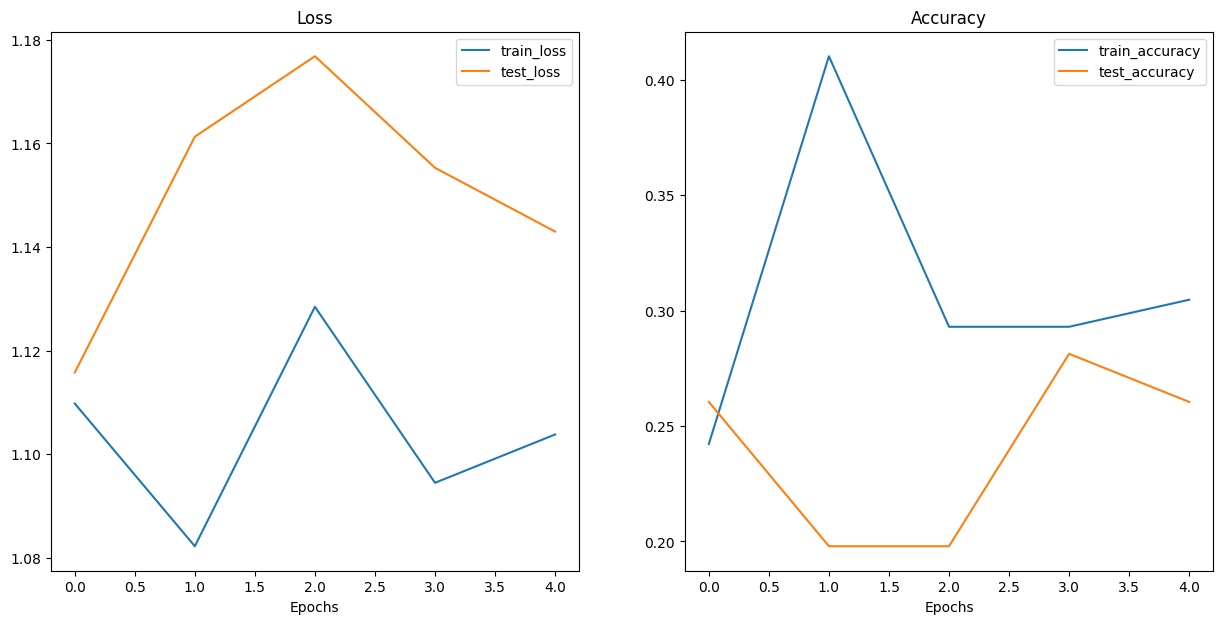

In [50]:
plot_loss_curves(model_0_results)

Woah.

Có vẻ như mọi thứ đang rất lộn xộn...

Nhưng chúng ta đã biết điều đó phần nào vì kết quả in ra của mô hình trong quá trình huấn luyện (training) không cho thấy nhiều triển vọng.

Bạn có thể thử huấn luyện (train) mô hình lâu hơn và xem điều gì xảy ra khi bạn vẽ đường cong mất mát (loss curve) trong một khoảng thời gian dài hơn.

## 8. Đường cong mất mát lý tưởng trông như thế nào?

Quan sát các đường cong mất mát (loss curves) huấn luyện (training) và test là một cách tuyệt vời để xem liệu mô hình của bạn có đang **overfitting** hay không.

Một mô hình overfitting là mô hình hoạt động tốt hơn (thường là với biên độ đáng kể) trên tập huấn luyện (training set) so với tập kiểm định/test (validation/test set).

Nếu mất mát huấn luyện (training loss) của bạn thấp hơn nhiều so với mất mát test (test loss), mô hình của bạn đang **overfitting**.

Như trong, nó đang học các mẫu trong quá trình huấn luyện (training) quá tốt và những mẫu đó không tổng quát hóa (generalizing) tốt cho dữ liệu test.

Mặt khác là khi mất mát huấn luyện (training loss) và test của bạn không thấp như bạn muốn, điều này được coi là **underfitting**.

Vị trí lý tưởng cho đường cong mất mát huấn luyện (training) và test là chúng thẳng hàng gần nhau.

<img src="https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/04-loss-curves-overfitting-underfitting-ideal.jpg" alt="different training and test loss curves illustrating overfitting, underfitting and the ideal loss curves" width="800"/>

*Trái: Nếu các đường cong mất mát huấn luyện (training) và test của bạn không thấp như bạn muốn, điều này được coi là **underfitting**. *Giữa:* Khi mất mát test/kiểm định (validation) cao hơn mất mát huấn luyện (training loss) của bạn, điều này được coi là **overfitting**. *Phải:* Tình huống lý tưởng là khi các đường cong mất mát huấn luyện (training) và test của bạn thẳng hàng theo thời gian. Điều này có nghĩa là mô hình của bạn đang tổng quát hóa (generalizing) tốt. Có nhiều tổ hợp và những điều khác nhau mà các đường cong mất mát có thể làm, để biết thêm về những điều này, hãy xem [hướng dẫn Interpreting Loss Curves](https://developers.google.com/machine-learning/testing-debugging/metrics/interpretic) của Google.*

### 8.1 Cách xử lý overfitting

Vì vấn đề chính với overfitting là mô hình của bạn đang khớp với dữ liệu huấn luyện (training data) *quá tốt*, bạn sẽ muốn sử dụng các kỹ thuật để "kiềm chế nó".

Một kỹ thuật phổ biến để ngăn chặn overfitting được gọi là [**regularization**](https://ml-cheatsheet.readthedocs.io/en/latest/regularization.html).

Tôi thích nghĩ về điều này như "làm cho các mô hình của chúng ta trở nên thường xuyên hơn", như trong, có khả năng phù hợp với *nhiều* loại dữ liệu hơn.

Hãy thảo luận về một vài phương pháp để ngăn chặn overfitting.

| **Phương pháp ngăn chặn overfitting** | **Nó là gì?** |
| ----- | ----- |
| **Lấy thêm dữ liệu** | Có nhiều dữ liệu hơn sẽ cho mô hình nhiều cơ hội hơn để học các mẫu, những mẫu có thể tổng quát hóa (generalizable) hơn cho các ví dụ mới. |
| **Đơn giản hóa mô hình của bạn** | Nếu mô hình hiện tại đã overfitting dữ liệu huấn luyện (training data), nó có thể là một mô hình quá phức tạp. Điều này có nghĩa là nó đang học các mẫu của dữ liệu quá tốt và không thể tổng quát hóa (generalize) tốt cho dữ liệu chưa thấy. Một cách để đơn giản hóa mô hình là giảm số lượng lớp (layers) mà nó sử dụng hoặc giảm số lượng đơn vị ẩn (hidden units) trong mỗi lớp. |
| **Sử dụng tăng cường dữ liệu (data augmentation)** | [**Tăng cường dữ liệu (Data augmentation)**](https://developers.google.com/machine-learning/glossary#data-augmentation) thao tác dữ liệu huấn luyện (training data) theo cách khiến mô hình khó học hơn vì nó nhân tạo thêm sự đa dạng vào dữ liệu. Nếu một mô hình có thể học các mẫu trong dữ liệu tăng cường (augmented data), mô hình có thể tổng quát hóa (generalize) tốt hơn cho dữ liệu chưa thấy. |
| **Sử dụng transfer learning** | [**Transfer learning**](https://developers.google.com/machine-learning/glossary#transfer-learning) bao gồm việc tận dụng các mẫu (cũng được gọi là pretrained weights) mà một mô hình đã học để sử dụng làm nền tảng cho nhiệm vụ của riêng bạn. Trong trường hợp của chúng ta, chúng ta có thể sử dụng một mô hình thị giác máy tính (computer vision model) được huấn luyện trước (pretrained) trên nhiều loại hình ảnh khác nhau và sau đó điều chỉnh nhẹ để chuyên biệt hơn cho hình ảnh thực phẩm. |
| **Sử dụng dropout layers** | Dropout layers ngẫu nhiên loại bỏ các kết nối giữa các lớp ẩn (hidden layers) trong mạng nơ-ron (neural networks), hiệu quả đơn giản hóa mô hình nhưng cũng làm cho các kết nối còn lại tốt hơn. Xem [`torch.nn.Dropout()`](https://pytorch.org/docs/stable/generated/torch.nn.Dropout.html) để biết thêm. |
| **Sử dụng learning rate decay** | Ý tưởng ở đây là từ từ giảm tốc độ học (learning rate) khi mô hình huấn luyện (trains). Điều này giống như với tay lấy một đồng xu ở phía sau ghế dài. Càng gần, các bước của bạn càng nhỏ. Tương tự với tốc độ học (learning rate), càng gần [**convergence**](https://developers.google.com/machine-learning/glossary#convergence), bạn sẽ muốn các cập nhật trọng số (weight updates) của mình nhỏ hơn.  |
| **Sử dụng early stopping** | [**Early stopping**](https://developers.google.com/machine-learning/glossary#early_stopping) dừng huấn luyện mô hình (model training) *trước khi* nó bắt đầu overfitting. Như trong, giả sử mất mát (loss) của mô hình đã ngừng giảm trong 10 epochs qua (con số này là tùy ý), bạn có thể muốn dừng huấn luyện mô hình (model training) tại đây và chọn trọng số mô hình (model weights) có mất mát thấp nhất (10 epochs trước). |

Có nhiều phương pháp khác để xử lý overfitting nhưng đây là một số phương pháp chính.

Khi bạn bắt đầu xây dựng ngày càng nhiều mô hình sâu (deep models), bạn sẽ thấy vì học sâu (deep learning) *rất giỏi* trong việc học các mẫu trong dữ liệu, việc xử lý overfitting là một trong những vấn đề chính của học sâu (deep learning).

### 8.2 Cách xử lý underfitting

Khi một mô hình đang [**underfitting**](https://developers.google.com/machine-learning/glossary#underfitting), nó được coi là có sức mạnh dự đoán kém trên tập huấn luyện (training) và test.

Về bản chất, một mô hình underfitting sẽ không thể giảm các giá trị mất mát (loss values) xuống mức mong muốn.

Hiện tại, nhìn vào các đường cong mất mát (loss curves) hiện tại của chúng ta, tôi sẽ coi mô hình `TinyVGG` của chúng ta, `model_0`, là underfitting dữ liệu.

Ý tưởng chính đằng sau việc xử lý underfitting là *tăng* sức mạnh dự đoán của mô hình.

Có một số cách để làm điều này.

| **Phương pháp ngăn chặn underfitting** | **Nó là gì?** |
| ----- | ----- |
| **Thêm nhiều lớp/đơn vị vào mô hình của bạn** | Nếu mô hình của bạn đang underfitting, nó có thể không có đủ khả năng để *học* các mẫu/trọng số/biểu diễn cần thiết của dữ liệu để có thể dự đoán. Một cách để thêm sức mạnh dự đoán cho mô hình của bạn là tăng số lượng lớp ẩn (hidden layers)/đơn vị trong các lớp đó. |
| **Điều chỉnh tốc độ học (learning rate)** | Có lẽ tốc độ học (learning rate) của mô hình bạn quá cao từ đầu. Và nó đang cố gắng cập nhật trọng số của mình mỗi epoch quá nhiều, từ đó không học được gì. Trong trường hợp này, bạn có thể giảm tốc độ học (learning rate) và xem điều gì xảy ra. |
| **Sử dụng transfer learning** | Transfer learning có khả năng ngăn chặn cả overfitting và underfitting. Nó bao gồm việc sử dụng các mẫu từ một mô hình đã hoạt động trước đây và điều chỉnh chúng cho vấn đề của riêng bạn. |
| **Huấn luyện (train) lâu hơn** | Đôi khi một mô hình chỉ cần nhiều thời gian hơn để học các biểu diễn của dữ liệu. Nếu bạn thấy trong các thí nghiệm nhỏ hơn của mình mô hình không học được gì, có lẽ để nó huấn luyện (train) trong nhiều epochs hơn có thể dẫn đến hiệu suất tốt hơn. |
| **Sử dụng ít regularization hơn** | Có lẽ mô hình của bạn đang underfitting vì bạn đang cố gắng ngăn chặn overfitting quá nhiều. Giữ lại các kỹ thuật regularization có thể giúp mô hình của bạn khớp với dữ liệu tốt hơn. |

### 8.3 Sự cân bằng giữa overfitting và underfitting

Không có phương pháp nào được thảo luận ở trên là viên đạn bạc, có nghĩa là, chúng không phải lúc nào cũng hoạt động.

Và việc ngăn chặn overfitting và underfitting có thể là lĩnh vực nghiên cứu học máy (machine learning) tích cực nhất.

Vì mọi người đều muốn mô hình của họ khớp tốt hơn (ít underfitting hơn) nhưng không quá tốt đến mức chúng không tổng quát hóa (generalize) tốt và hoạt động trong thế giới thực (ít overfitting hơn).

Có một ranh giới mỏng giữa overfitting và underfitting.

Bởi vì quá nhiều của mỗi cái có thể gây ra cái kia.

Transfer learning có lẽ là một trong những kỹ thuật mạnh mẽ nhất khi nói đến việc xử lý cả overfitting và underfitting trên các vấn đề của riêng bạn.

Thay vì tạo thủ công các kỹ thuật overfitting và underfitting khác nhau, transfer learning cho phép bạn lấy một mô hình đã hoạt động trong không gian vấn đề tương tự như của bạn (chẳng hạn như một mô hình từ [paperswithcode.com/sota](https://paperswithcode.com/sota) hoặc [Hugging Face models](https://huggingface.co/models)) và áp dụng nó cho tập dữ liệu (dataset) của riêng bạn.

Chúng ta sẽ thấy sức mạnh của transfer learning trong một notebook sau.

## 9. Mô hình 1: TinyVGG với Tăng cường Dữ liệu (Data Augmentation)

Đã đến lúc thử một mô hình khác!

Lần này, hãy tải dữ liệu và sử dụng **tăng cường dữ liệu (data augmentation)** để xem liệu nó có cải thiện kết quả của chúng ta theo cách nào đó hay không.

Đầu tiên, chúng ta sẽ tạo một phép biến đổi huấn luyện (training transform) để bao gồm `transforms.TrivialAugmentWide()` cũng như thay đổi kích thước và chuyển hình ảnh của chúng ta thành tensors.

Chúng ta sẽ làm tương tự cho một phép biến đổi test ngoại trừ việc không có tăng cường dữ liệu (data augmentation).

### 9.1 Tạo transform với tăng cường dữ liệu (data augmentation)

In [51]:
# Tạo training transform với TrivialAugment (Create training transform with TrivialAugment)
train_transform_trivial_augment = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.TrivialAugmentWide(num_magnitude_bins=31),
    transforms.ToTensor()
])

# Tạo testing transform (không có data augmentation) (Create testing transform (no data augmentation))
test_transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor()
])

Tuyệt vời!

Bây giờ hãy chuyển hình ảnh của chúng ta thành `Dataset`'s bằng cách sử dụng `torchvision.datasets.ImageFolder()` và sau đó thành `DataLoader`'s với `torch.utils.data.DataLoader()`.

### 9.2 Tạo `Dataset`'s và `DataLoader`'s train và test

Chúng ta sẽ đảm bảo `Dataset` train sử dụng `train_transform_trivial_augment` và `Dataset` test sử dụng `test_transform`.

In [52]:
# Chuyển các thư mục hình ảnh thành Datasets (Turn image folders into Datasets)
train_data_augmented = datasets.ImageFolder(train_dir, transform=train_transform_trivial_augment)
test_data_simple = datasets.ImageFolder(test_dir, transform=test_transform)

train_data_augmented, test_data_simple

(Dataset ImageFolder
     Number of datapoints: 225
     Root location: data/pizza_steak_sushi/train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                TrivialAugmentWide(num_magnitude_bins=31, interpolation=InterpolationMode.NEAREST, fill=None)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 75
     Root location: data/pizza_steak_sushi/test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                ToTensor()
            ))

Và chúng ta sẽ tạo `DataLoader`'s với `batch_size=32` và với `num_workers` được đặt thành số CPU có sẵn trên máy của chúng ta (chúng ta có thể lấy điều này bằng cách sử dụng `os.cpu_count()` của Python).

In [53]:
# Chuyển Datasets thành DataLoader's (Turn Datasets into DataLoader's)
import os
BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()

torch.manual_seed(42)
train_dataloader_augmented = DataLoader(train_data_augmented,
                                        batch_size=BATCH_SIZE,
                                        shuffle=True,
                                        num_workers=NUM_WORKERS)

test_dataloader_simple = DataLoader(test_data_simple,
                                    batch_size=BATCH_SIZE,
                                    shuffle=False,
                                    num_workers=NUM_WORKERS)

train_dataloader_augmented, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x78c5543580d0>,
 <torch.utils.data.dataloader.DataLoader at 0x78c55d655d50>)

### 9.3 Xây dựng và huấn luyện Mô hình 1

Dữ liệu đã được tải!

Bây giờ để xây dựng mô hình tiếp theo của chúng ta, `model_1`, chúng ta có thể tái sử dụng lớp `TinyVGG` từ trước.

Chúng ta sẽ đảm bảo gửi nó đến target device.

In [54]:
# Tạo model_1 và gửi nó đến target device (Create model_1 and send it to the target device)
torch.manual_seed(42)
model_1 = TinyVGG(
    input_shape=3,
    hidden_units=10,
    output_shape=len(train_data_augmented.classes)).to(device)
model_1

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=2560, out_features=3, bias=True)
  )
)

Mô hình đã sẵn sàng!

Đã đến lúc huấn luyện (train)!

Vì chúng ta đã có các hàm cho vòng lặp huấn luyện (training loop) (`train_step()`) và vòng lặp test (`test_step()`) và một hàm để kết hợp chúng trong `train()`, hãy tái sử dụng những hàm đó.

Chúng ta sẽ sử dụng cùng thiết lập như `model_0` với chỉ tham số `train_dataloader` khác nhau:
* Huấn luyện (train) trong 5 epochs.
* Sử dụng `train_dataloader=train_dataloader_augmented` làm dữ liệu huấn luyện (training data) trong `train()`.
* Sử dụng `torch.nn.CrossEntropyLoss()` làm hàm mất mát (loss function) (vì chúng ta đang làm việc với phân loại đa lớp).
* Sử dụng `torch.optim.Adam()` với `lr=0.001` làm tốc độ học (learning rate) làm optimizer.

In [55]:
# Đặt random seeds (Set random seeds)
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Đặt số epochs (Set number of epochs)
NUM_EPOCHS = 5

# Thiết lập loss function và optimizer (Setup loss function and optimizer)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_1.parameters(), lr=0.001)

# Bắt đầu timer (Start the timer)
from timeit import default_timer as timer
start_time = timer()

# Huấn luyện model_1 (Train model_1)
model_1_results = train(model=model_1,
                        train_dataloader=train_dataloader_augmented,
                        test_dataloader=test_dataloader_simple,
                        optimizer=optimizer,
                        loss_fn=loss_fn,
                        epochs=NUM_EPOCHS)

# End the timer and print out how long it took
end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

  0%|          | 0/5 [00:00<?, ?it/s]

Train step...


  0%|          | 0/8 [00:00<?, ?it/s]

Test step...


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.0996 | train_acc: 0.4219 | test_loss: 1.1240 | test_acc: 0.2604
Train step...


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x78c5a07e60c0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py", line 1618, in __del__
    

  0%|          | 0/8 [00:00<?, ?it/s]

self._shutdown_workers()
  File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py", line 1601, in _shutdown_workers
Exception ignored in:     <function _MultiProcessingDataLoaderIter.__del__ at 0x78c5a07e60c0>if w.is_alive():
Traceback (most recent call last):

   File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py", line 1618, in __del__
      self._shutdown_workers() 
   File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py", line 1601, in _shutdown_workers
      ^if w.is_alive():^
^ ^  ^ ^ ^ ^ ^^^^^^^
^  File "/usr/lib/python3.11/multiprocessing/process.py", line 160, in is_alive
    ^assert self._parent_pid == os.getpid(), 'can only test a child process'
^^ ^^ ^ ^ ^ 
   File "/usr/lib/python3.11/multiprocessing/process.py", line 160, in is_alive
       assert self._parent_pid == os.getpid(), 'can only test a child process'  
^  ^ ^^ ^^ ^  ^ ^ ^^^^  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
^AssertionError^: ^can only 

Test step...


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 2 | train_loss: 1.1129 | train_acc: 0.3047 | test_loss: 1.0973 | test_acc: 0.2604
Train step...


  0%|          | 0/8 [00:00<?, ?it/s]

Test step...


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 3 | train_loss: 1.0937 | train_acc: 0.4258 | test_loss: 1.0661 | test_acc: 0.5417
Train step...


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x78c5a07e60c0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py", line 1618, in __del__
    

  0%|          | 0/8 [00:00<?, ?it/s]

self._shutdown_workers()
  File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py", line 1601, in _shutdown_workers
    if w.is_alive():
       ^^^^^^^^^Exception ignored in: ^<function _MultiProcessingDataLoaderIter.__del__ at 0x78c5a07e60c0>^
^Traceback (most recent call last):

  File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py", line 1618, in __del__
  File "/usr/lib/python3.11/multiprocessing/process.py", line 160, in is_alive
        self._shutdown_workers()assert self._parent_pid == os.getpid(), 'can only test a child process'

  File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py", line 1601, in _shutdown_workers
      if w.is_alive(): 
               ^^^^^^^^^^^^^^^^^^^^^^^^^^
^  File "/usr/lib/python3.11/multiprocessing/process.py", line 160, in is_alive
^^    ^assert self._parent_pid == os.getpid(), 'can only test a child process'^
^^  ^ ^^ ^ ^  ^ ^^ ^ ^
 AssertionError^^: ^can only test a child proce

Test step...


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 4 | train_loss: 1.0874 | train_acc: 0.4023 | test_loss: 1.0487 | test_acc: 0.5417
Train step...


  0%|          | 0/8 [00:00<?, ?it/s]

Test step...


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 5 | train_loss: 1.1257 | train_acc: 0.2812 | test_loss: 1.0426 | test_acc: 0.5417
Total training time: 15.988 seconds


Hmm...

Có vẻ như mô hình của chúng ta lại không hoạt động tốt lắm.

Hãy kiểm tra các đường cong mất mát (loss curves) của nó.

### 9.4 Vẽ đồ thị đường cong mất mát của Mô hình 1

Vì chúng ta đã lưu kết quả của `model_1` trong một từ điển kết quả, `model_1_results`, chúng ta có thể vẽ chúng bằng cách sử dụng `plot_loss_curves()`.

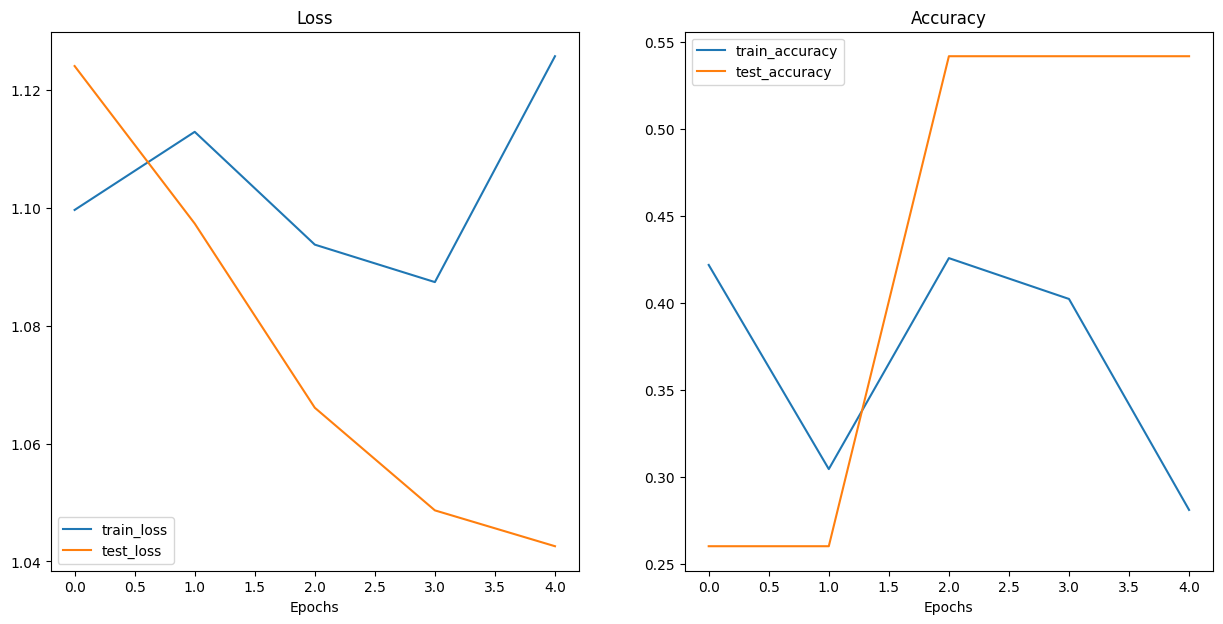

In [56]:
plot_loss_curves(model_1_results)

Wow...

Những cái này cũng không trông tốt lắm...

Mô hình của chúng ta đang **underfitting** hay **overfitting**?

Hoặc cả hai?

Lý tưởng nhất là chúng ta muốn nó có độ chính xác (accuracy) cao hơn và mất mát (loss) thấp hơn phải không?

Một số phương pháp bạn có thể thử sử dụng để đạt được những điều này là gì?

## 10. So sánh kết quả mô hình (Compare model results)

Mặc dù các mô hình của chúng ta hoạt động khá kém, chúng ta vẫn có thể viết code để so sánh chúng.

Hãy đầu tiên chuyển kết quả mô hình của chúng ta thành pandas DataFrames.

In [57]:
import pandas as pd
model_0_df = pd.DataFrame(model_0_results)
model_1_df = pd.DataFrame(model_1_results)
model_0_df

,train_loss,train_acc,test_loss,test_acc
0,1.109784,0.242188,1.115760,0.260417
1,1.082225,0.410156,1.161303,0.197917
2,1.128462,0.292969,1.176844,0.197917
3,1.094470,0.292969,1.155295,0.281250
4,1.103802,0.304688,1.142979,0.260417


Và bây giờ chúng ta có thể viết một số code vẽ biểu đồ bằng cách sử dụng `matplotlib` để trực quan hóa kết quả của `model_0` và `model_1` cùng nhau.

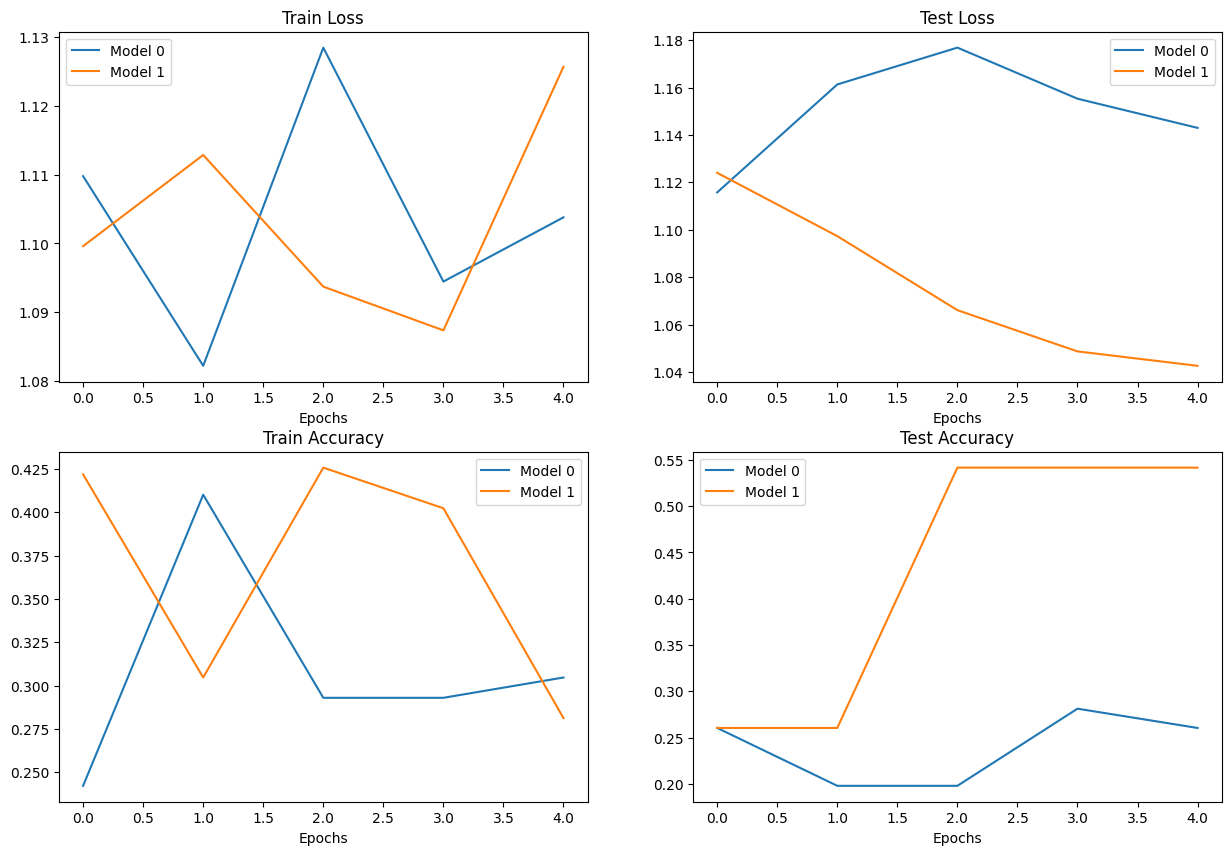

In [58]:
# Thiết lập một biểu đồ (Setup a plot)
plt.figure(figsize=(15, 10))

# Lấy số epochs (Get number of epochs)
epochs = range(len(model_0_df))

# Vẽ train loss (Plot train loss)
plt.subplot(2, 2, 1)
plt.plot(epochs, model_0_df["train_loss"], label="Model 0")
plt.plot(epochs, model_1_df["train_loss"], label="Model 1")
plt.title("Train Loss")
plt.xlabel("Epochs")
plt.legend()

# Vẽ test loss (Plot test loss)
plt.subplot(2, 2, 2)
plt.plot(epochs, model_0_df["test_loss"], label="Model 0")
plt.plot(epochs, model_1_df["test_loss"], label="Model 1")
plt.title("Test Loss")
plt.xlabel("Epochs")
plt.legend()

# Vẽ train accuracy (Plot train accuracy)
plt.subplot(2, 2, 3)
plt.plot(epochs, model_0_df["train_acc"], label="Model 0")
plt.plot(epochs, model_1_df["train_acc"], label="Model 1")
plt.title("Train Accuracy")
plt.xlabel("Epochs")
plt.legend()

# Vẽ test accuracy (Plot test accuracy)
plt.subplot(2, 2, 4)
plt.plot(epochs, model_0_df["test_acc"], label="Model 0")
plt.plot(epochs, model_1_df["test_acc"], label="Model 1")
plt.title("Test Accuracy")
plt.xlabel("Epochs")
plt.legend();

Có vẻ như cả hai mô hình của chúng ta đều hoạt động tệ như nhau và khá thất thường (các chỉ số tăng giảm đột ngột).

Nếu bạn xây dựng `model_2`, bạn sẽ làm gì khác đi để cố gắng cải thiện hiệu suất (performance)?

## 11. Thực hiện dự đoán trên hình ảnh tùy chỉnh (Make a prediction on a custom image)

Nếu bạn đã huấn luyện (trained) một mô hình trên một tập dữ liệu (dataset) nhất định, có thể bạn muốn thực hiện dự đoán (prediction) trên dữ liệu tùy chỉnh (custom data) của riêng mình.

Trong trường hợp của chúng ta, vì chúng ta đã huấn luyện một mô hình trên các hình ảnh pizza, steak và sushi, làm thế nào chúng ta có thể sử dụng mô hình để thực hiện dự đoán trên một trong những hình ảnh của riêng chúng ta?

Để làm điều đó, chúng ta có thể tải một hình ảnh và sau đó **tiền xử lý nó theo cách phù hợp với loại dữ liệu mà mô hình của chúng ta đã được huấn luyện**.

Nói cách khác, chúng ta sẽ phải chuyển đổi hình ảnh tùy chỉnh của riêng mình thành tensor và đảm bảo nó có đúng kiểu dữ liệu (datatype) trước khi truyền vào mô hình.

Hãy bắt đầu bằng cách tải xuống một hình ảnh tùy chỉnh.

Vì mô hình của chúng ta dự đoán xem hình ảnh có chứa pizza, steak hay sushi, hãy tải xuống một bức ảnh [bố tôi giơ hai ngón tay cái lên với một chiếc pizza lớn từ Learn PyTorch for Deep Learning GitHub](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/images/04-pizza-dad.jpeg).

Chúng ta tải xuống hình ảnh bằng cách sử dụng module `requests` của Python.

> **Lưu ý:** Nếu bạn đang sử dụng Google Colab, bạn cũng có thể tải lên hình ảnh vào phiên hiện tại bằng cách vào menu bên trái -> Files -> Upload to session storage. Tuy nhiên hãy lưu ý rằng hình ảnh này sẽ bị xóa khi phiên Google Colab của bạn kết thúc.

In [59]:
# Tải xuống hình ảnh tùy chỉnh (Download custom image)
import requests

# Thiết lập đường dẫn hình ảnh tùy chỉnh (Setup custom image path)
custom_image_path = data_path / "04-pizza-dad.jpeg"

# Tải xuống hình ảnh nếu nó chưa tồn tại (Download the image if it doesn't already exist)
if not custom_image_path.is_file():
    with open(custom_image_path, "wb") as f:
        # Khi tải xuống từ GitHub, cần sử dụng liên kết file "raw" (When downloading from GitHub, need to use the "raw" file link)
        request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/04-pizza-dad.jpeg")
        print(f"Downloading {custom_image_path}...")
        f.write(request.content)
else:
    print(f"{custom_image_path} already exists, skipping download.")

data/04-pizza-dad.jpeg already exists, skipping download.


### 11.1 Tải hình ảnh tùy chỉnh với PyTorch (Loading in a custom image with PyTorch)

Tuyệt vời!

Có vẻ như chúng ta đã có một hình ảnh tùy chỉnh được tải xuống và sẵn sàng tại `data/04-pizza-dad.jpeg`.

Đã đến lúc tải nó vào.

`torchvision` của PyTorch có một số phương thức đầu vào và đầu ra ("IO" hay "io" cho ngắn gọn) để đọc và ghi hình ảnh và video trong [`torchvision.io`](https://pytorch.org/vision/stable/io.html).

Vì chúng ta muốn tải vào một hình ảnh, chúng ta sẽ sử dụng [`torchvision.io.read_image()`](https://pytorch.org/vision/stable/generated/torchvision.io.read_image.html#torchvision.io.read_image).

Phương thức này sẽ đọc một hình ảnh JPEG hoặc PNG và biến nó thành một `torch.Tensor` RGB hoặc grayscale 3 chiều với các giá trị có kiểu dữ liệu (datatype) `uint8` trong khoảng `[0, 255]`.

Hãy thử nó.

In [60]:
import torchvision

# Đọc hình ảnh tùy chỉnh (Read in custom image)
custom_image_uint8 = torchvision.io.read_image(str(custom_image_path))

# In ra dữ liệu hình ảnh (Print out image data)
print(f"Custom image tensor:\n{custom_image_uint8}\n")
print(f"Custom image shape: {custom_image_uint8.shape}\n")
print(f"Custom image dtype: {custom_image_uint8.dtype}")

Custom image tensor:
tensor([[[154, 173, 181,  ...,  21,  18,  14],
         [146, 165, 181,  ...,  21,  18,  15],
         [124, 146, 172,  ...,  18,  17,  15],
         ...,
         [ 72,  59,  45,  ..., 152, 150, 148],
         [ 64,  55,  41,  ..., 150, 147, 144],
         [ 64,  60,  46,  ..., 149, 146, 143]],

        [[171, 190, 193,  ...,  22,  19,  15],
         [163, 182, 193,  ...,  22,  19,  16],
         [141, 163, 184,  ...,  19,  18,  16],
         ...,
         [ 55,  42,  28,  ..., 107, 104, 103],
         [ 47,  38,  24,  ..., 108, 104, 102],
         [ 47,  43,  29,  ..., 107, 104, 101]],

        [[119, 138, 147,  ...,  17,  14,  10],
         [111, 130, 145,  ...,  17,  14,  11],
         [ 87, 111, 136,  ...,  14,  13,  11],
         ...,
         [ 35,  22,   8,  ...,  52,  52,  48],
         [ 27,  18,   4,  ...,  50,  49,  44],
         [ 27,  23,   9,  ...,  49,  46,  43]]], dtype=torch.uint8)

Custom image shape: torch.Size([3, 4032, 3024])

Custom image dty

Tuyệt! Có vẻ như hình ảnh của chúng ta đã ở định dạng tensor, tuy nhiên, định dạng hình ảnh này có tương thích với mô hình của chúng ta không?

Tensor `custom_image` của chúng ta có kiểu dữ liệu (datatype) `torch.uint8` và các giá trị của nó nằm trong khoảng `[0, 255]`.

Nhưng mô hình của chúng ta nhận các tensor hình ảnh có kiểu dữ liệu `torch.float32` và với các giá trị nằm trong khoảng `[0, 1]`.

Vì vậy, trước khi sử dụng hình ảnh tùy chỉnh với mô hình, **chúng ta cần chuyển đổi nó sang cùng định dạng với dữ liệu mà mô hình được huấn luyện**.

Nếu chúng ta không làm điều này, mô hình sẽ báo lỗi.

In [61]:
# Thử thực hiện dự đoán trên hình ảnh ở định dạng uint8 (điều này sẽ báo lỗi) (Try to make a prediction on image in uint8 format (this will error))
model_1.eval()
with torch.inference_mode():
    model_1(custom_image_uint8.to(device))

RuntimeError: Input type (unsigned char) and bias type (float) should be the same

Nếu chúng ta cố gắng thực hiện dự đoán trên một hình ảnh có kiểu dữ liệu (datatype) khác với những gì mô hình đã được huấn luyện, chúng ta sẽ gặp lỗi như sau:

> `RuntimeError: Input type (torch.cuda.ByteTensor) and weight type (torch.cuda.FloatTensor) should be the same`

Hãy khắc phục điều này bằng cách chuyển đổi hình ảnh tùy chỉnh sang cùng kiểu dữ liệu với những gì mô hình đã được huấn luyện (`torch.float32`).

In [62]:
# Tải hình ảnh tùy chỉnh và chuyển đổi các giá trị tensor sang float32 (Load in custom image and convert the tensor values to float32)
custom_image = torchvision.io.read_image(str(custom_image_path)).type(torch.float32)

# Chia các giá trị pixel hình ảnh cho 255 để đưa chúng về khoảng [0, 1] (Divide the image pixel values by 255 to get them between [0, 1])
custom_image = custom_image / 255.

# In ra dữ liệu hình ảnh (Print out image data)
print(f"Custom image tensor:\n{custom_image}\n")
print(f"Custom image shape: {custom_image.shape}\n")
print(f"Custom image dtype: {custom_image.dtype}")

Custom image tensor:
tensor([[[0.6039, 0.6784, 0.7098,  ..., 0.0824, 0.0706, 0.0549],
         [0.5725, 0.6471, 0.7098,  ..., 0.0824, 0.0706, 0.0588],
         [0.4863, 0.5725, 0.6745,  ..., 0.0706, 0.0667, 0.0588],
         ...,
         [0.2824, 0.2314, 0.1765,  ..., 0.5961, 0.5882, 0.5804],
         [0.2510, 0.2157, 0.1608,  ..., 0.5882, 0.5765, 0.5647],
         [0.2510, 0.2353, 0.1804,  ..., 0.5843, 0.5725, 0.5608]],

        [[0.6706, 0.7451, 0.7569,  ..., 0.0863, 0.0745, 0.0588],
         [0.6392, 0.7137, 0.7569,  ..., 0.0863, 0.0745, 0.0627],
         [0.5529, 0.6392, 0.7216,  ..., 0.0745, 0.0706, 0.0627],
         ...,
         [0.2157, 0.1647, 0.1098,  ..., 0.4196, 0.4078, 0.4039],
         [0.1843, 0.1490, 0.0941,  ..., 0.4235, 0.4078, 0.4000],
         [0.1843, 0.1686, 0.1137,  ..., 0.4196, 0.4078, 0.3961]],

        [[0.4667, 0.5412, 0.5765,  ..., 0.0667, 0.0549, 0.0392],
         [0.4353, 0.5098, 0.5686,  ..., 0.0667, 0.0549, 0.0431],
         [0.3412, 0.4353, 0.5333,  ..

### 11.2 Dự đoán trên hình ảnh tùy chỉnh với mô hình PyTorch đã được huấn luyện (Predicting on custom images with a trained PyTorch model)

Tuyệt vời, có vẻ như dữ liệu hình ảnh của chúng ta hiện đã có cùng định dạng với những gì mô hình được huấn luyện.

Ngoại trừ một điều...

Đó là `shape` (hình dạng).

Mô hình của chúng ta được huấn luyện trên các hình ảnh có shape `[3, 64, 64]`, trong khi hình ảnh tùy chỉnh của chúng ta hiện tại có shape `[3, 4032, 3024]`.

Làm thế nào chúng ta có thể đảm bảo hình ảnh tùy chỉnh có cùng shape với các hình ảnh mà mô hình đã được huấn luyện?

Có `torchvision.transforms` nào có thể giúp không?

Trước khi trả lời câu hỏi đó, hãy vẽ hình ảnh bằng `matplotlib` để đảm bảo nó trông ổn, hãy nhớ rằng chúng ta sẽ phải permute (hoán vị) các chiều từ `CHW` thành `HWC` để phù hợp với yêu cầu của `matplotlib`.

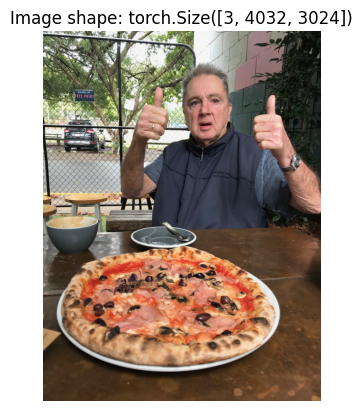

In [63]:
# Vẽ hình ảnh tùy chỉnh (Plot custom image)
plt.imshow(custom_image.permute(1, 2, 0)) # cần permute các chiều hình ảnh từ CHW -> HWC nếu không matplotlib sẽ báo lỗi (need to permute image dimensions from CHW -> HWC otherwise matplotlib will error)
plt.title(f"Image shape: {custom_image.shape}")
plt.axis(False);

Hai ngón tay cái lên!

Bây giờ làm thế nào chúng ta có thể đưa hình ảnh về cùng kích thước với các hình ảnh mà mô hình đã được huấn luyện?

Một cách để làm điều đó là với `torchvision.transforms.Resize()`.

Hãy tạo một pipeline transform để thực hiện điều đó.

In [64]:
# Tạo pipeline transform để thay đổi kích thước hình ảnh (Create transform pipleine to resize image)
custom_image_transform = transforms.Compose([
    transforms.Resize((64, 64)),
])

# Transform hình ảnh đích (Transform target image)
custom_image_transformed = custom_image_transform(custom_image)

# In ra shape gốc và shape mới (Print out original shape and new shape)
print(f"Original shape: {custom_image.shape}")
print(f"New shape: {custom_image_transformed.shape}")

Original shape: torch.Size([3, 4032, 3024])
New shape: torch.Size([3, 64, 64])


Woohoo!

Cuối cùng hãy thực hiện dự đoán trên hình ảnh tùy chỉnh của riêng chúng ta.

In [65]:
model_1.eval()
with torch.inference_mode():
    custom_image_pred = model_1(custom_image_transformed)

RuntimeError: mat1 and mat2 shapes cannot be multiplied (10x256 and 2560x3)

Ôi trời ơi...

Mặc dù đã chuẩn bị, hình ảnh tùy chỉnh và mô hình của chúng ta lại ở các thiết bị (devices) khác nhau.

Và chúng ta gặp lỗi:

> `RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cpu and cuda:0! (when checking argument for argument weight in method wrapper___slow_conv2d_forward)`

Hãy khắc phục điều đó bằng cách đưa `custom_image_transformed` lên thiết bị đích (target device).

In [66]:
model_1.eval()
with torch.inference_mode():
    custom_image_pred = model_1(custom_image_transformed.to(device))

RuntimeError: mat1 and mat2 shapes cannot be multiplied (10x256 and 2560x3)

Sao thế này?

Có vẻ như chúng ta đang gặp lỗi shape.

Tại sao lại như vậy?

Chúng ta đã chuyển đổi hình ảnh tùy chỉnh để có cùng kích thước với các hình ảnh mà mô hình đã được huấn luyện...

Ồ đợi đã...

Có một chiều (dimension) mà chúng ta đã quên.

Kích thước batch (batch size).

Mô hình của chúng ta mong đợi các tensor hình ảnh có chiều kích thước batch ở đầu (`NCHW` trong đó `N` là kích thước batch).

Ngoại trừ hình ảnh tùy chỉnh của chúng ta hiện chỉ có `CHW`.

Chúng ta có thể thêm chiều kích thước batch bằng cách sử dụng `torch.unsqueeze(dim=0)` để thêm một chiều bổ sung cho hình ảnh và *cuối cùng* thực hiện dự đoán.

Về cơ bản, chúng ta sẽ yêu cầu mô hình dự đoán trên một hình ảnh duy nhất (một hình ảnh có `batch_size` là 1).

In [67]:
model_1.eval()
with torch.inference_mode():
    # Thêm một chiều bổ sung cho hình ảnh (Add an extra dimension to image)
    custom_image_transformed_with_batch_size = custom_image_transformed.unsqueeze(dim=0)

    # In ra các shape khác nhau (Print out different shapes)
    print(f"Custom image transformed shape: {custom_image_transformed.shape}")
    print(f"Unsqueezed custom image shape: {custom_image_transformed_with_batch_size.shape}")

    # Thực hiện dự đoán trên hình ảnh với chiều bổ sung (Make a prediction on image with an extra dimension)
    custom_image_pred = model_1(custom_image_transformed.unsqueeze(dim=0).to(device))

Custom image transformed shape: torch.Size([3, 64, 64])
Unsqueezed custom image shape: torch.Size([1, 3, 64, 64])


Vâng!!!

Có vẻ như nó đã hoạt động!

> **Lưu ý:** Những gì chúng ta vừa trải qua là ba vấn đề cổ điển và phổ biến nhất của deep learning và PyTorch:
> 1. **Sai kiểu dữ liệu (datatypes)** - mô hình của chúng ta mong đợi `torch.float32` trong khi hình ảnh tùy chỉnh gốc của chúng ta là `uint8`.
> 2. **Sai thiết bị (device)** - mô hình của chúng ta ở trên `device` đích (trong trường hợp của chúng ta là GPU) trong khi dữ liệu đích chưa được chuyển đến `device` đích.
> 3. **Sai shapes** - mô hình của chúng ta mong đợi hình ảnh đầu vào có shape `[N, C, H, W]` hoặc `[batch_size, color_channels, height, width]` trong khi tensor hình ảnh tùy chỉnh của chúng ta có shape `[color_channels, height, width]`.
>
> Hãy nhớ rằng, những lỗi này không chỉ dành cho việc dự đoán trên hình ảnh tùy chỉnh.
>
> Chúng sẽ xuất hiện với hầu hết mọi loại dữ liệu (văn bản, âm thanh, dữ liệu có cấu trúc) và vấn đề mà bạn làm việc.

Bây giờ hãy xem các dự đoán của mô hình.

In [68]:
custom_image_pred

tensor([[-0.0348, -0.1095,  0.2157]])

Được rồi, những kết quả này vẫn ở *dạng logit* (các đầu ra thô của mô hình được gọi là logits).

Hãy chuyển đổi chúng từ logits -> xác suất dự đoán (prediction probabilities) -> nhãn dự đoán (prediction labels).

In [69]:
# In ra prediction logits (Print out prediction logits)
print(f"Prediction logits: {custom_image_pred}")

# Chuyển đổi logits -> xác suất dự đoán (sử dụng torch.softmax() cho phân loại đa lớp) (Convert logits -> prediction probabilities (using torch.softmax() for multi-class classification))
custom_image_pred_probs = torch.softmax(custom_image_pred, dim=1)
print(f"Prediction probabilities: {custom_image_pred_probs}")

# Chuyển đổi xác suất dự đoán -> nhãn dự đoán (Convert prediction probabilities -> prediction labels)
custom_image_pred_label = torch.argmax(custom_image_pred_probs, dim=1)
print(f"Prediction label: {custom_image_pred_label}")

Prediction logits: tensor([[-0.0348, -0.1095,  0.2157]])
Prediction probabilities: tensor([[0.3113, 0.2889, 0.3999]])
Prediction label: tensor([2])


Được rồi!

Trông tốt đấy.

Nhưng tất nhiên nhãn dự đoán của chúng ta vẫn ở dạng index/tensor.

Chúng ta có thể chuyển đổi nó thành dự đoán tên lớp (class name) dạng chuỗi bằng cách lập chỉ mục (indexing) trên danh sách `class_names`.

In [70]:
# Tìm nhãn được dự đoán (Find the predicted label)
custom_image_pred_class = class_names[custom_image_pred_label.cpu()] # đưa pred label lên CPU, nếu không sẽ báo lỗi (put pred label to CPU, otherwise will error)
custom_image_pred_class

'sushi'

Wow.

Có vẻ như mô hình dự đoán đúng, mặc dù nó hoạt động kém dựa trên các chỉ số đánh giá (evaluation metrics) của chúng ta.

> **Lưu ý:** Mô hình ở dạng hiện tại sẽ dự đoán "pizza", "steak" hoặc "sushi" bất kể hình ảnh nào được đưa vào. Nếu bạn muốn mô hình dự đoán một lớp khác, bạn sẽ phải huấn luyện nó để làm như vậy.

Nhưng nếu chúng ta kiểm tra `custom_image_pred_probs`, chúng ta sẽ nhận thấy rằng mô hình gần như cho trọng số bằng nhau (các giá trị tương tự) cho mọi lớp.

In [71]:
# The values of the prediction probabilities are quite similar
custom_image_pred_probs

tensor([[0.3113, 0.2889, 0.3999]])

Có xác suất dự đoán (prediction probabilities) tương tự như thế này có thể có nghĩa là một vài điều:
1. Mô hình đang cố gắng dự đoán cả ba lớp cùng một lúc (có thể có một hình ảnh chứa pizza, steak và sushi).
2. Mô hình không thực sự biết nó muốn dự đoán gì và do đó chỉ gán các giá trị tương tự cho mỗi lớp.

Trường hợp của chúng ta là số 2, vì mô hình được huấn luyện kém, về cơ bản nó đang *đoán* dự đoán.

### 11.3 Kết hợp dự đoán hình ảnh tùy chỉnh: xây dựng một hàm (Putting custom image prediction together: building a function)

Thực hiện tất cả các bước trên mỗi khi bạn muốn thực hiện dự đoán trên hình ảnh tùy chỉnh sẽ nhanh chóng trở nên tẻ nhạt.

Vì vậy, hãy kết hợp tất cả chúng lại trong một hàm mà chúng ta có thể dễ dàng sử dụng lặp đi lặp lại.

Cụ thể, hãy tạo một hàm:
1. Nhận đường dẫn hình ảnh đích (target image path) và chuyển đổi sang kiểu dữ liệu phù hợp cho mô hình (`torch.float32`).
2. Đảm bảo các giá trị pixel hình ảnh đích nằm trong khoảng `[0, 1]`.
3. Transform hình ảnh đích nếu cần thiết.
4. Đảm bảo mô hình ở trên thiết bị đích (target device).
5. Thực hiện dự đoán trên hình ảnh đích với mô hình đã được huấn luyện (đảm bảo hình ảnh có kích thước phù hợp và trên cùng thiết bị với mô hình).
6. Chuyển đổi các logits đầu ra của mô hình thành xác suất dự đoán.
7. Chuyển đổi xác suất dự đoán thành nhãn dự đoán.
8. Vẽ hình ảnh đích cùng với dự đoán của mô hình và xác suất dự đoán.

Khá nhiều bước nhưng chúng ta có thể làm được!

In [72]:
def pred_and_plot_image(model: torch.nn.Module,
                        image_path: str,
                        class_names: List[str] = None,
                        transform=None,
                        device: torch.device = device):
    """Thực hiện dự đoán trên hình ảnh đích và vẽ hình ảnh với dự đoán của nó. (Makes a prediction on a target image and plots the image with its prediction.)"""

    # 1. Tải hình ảnh và chuyển đổi các giá trị tensor sang float32 (Load in image and convert the tensor values to float32)
    target_image = torchvision.io.read_image(str(image_path)).type(torch.float32)

    # 2. Chia các giá trị pixel hình ảnh cho 255 để đưa chúng về khoảng [0, 1] (Divide the image pixel values by 255 to get them between [0, 1])
    target_image = target_image / 255.

    # 3. Transform nếu cần thiết (Transform if necessary)
    if transform:
        target_image = transform(target_image)

    # 4. Đảm bảo mô hình ở trên thiết bị đích (Make sure the model is on the target device)
    model.to(device)

    # 5. Bật chế độ đánh giá mô hình và chế độ inference (Turn on model evaluation mode and inference mode)
    model.eval()
    with torch.inference_mode():
        # Thêm một chiều bổ sung cho hình ảnh (Add an extra dimension to the image)
        target_image = target_image.unsqueeze(dim=0)

        # Thực hiện dự đoán trên hình ảnh với chiều bổ sung và gửi nó đến thiết bị đích (Make a prediction on image with an extra dimension and send it to the target device)
        target_image_pred = model(target_image.to(device))

    # 6. Chuyển đổi logits -> xác suất dự đoán (sử dụng torch.softmax() cho phân loại đa lớp) (Convert logits -> prediction probabilities (using torch.softmax() for multi-class classification))
    target_image_pred_probs = torch.softmax(target_image_pred, dim=1)

    # 7. Chuyển đổi xác suất dự đoán -> nhãn dự đoán (Convert prediction probabilities -> prediction labels)
    target_image_pred_label = torch.argmax(target_image_pred_probs, dim=1)

    # 8. Vẽ hình ảnh cùng với dự đoán và xác suất dự đoán (Plot the image alongside the prediction and prediction probability)
    plt.imshow(target_image.squeeze().permute(1, 2, 0)) # đảm bảo nó có kích thước phù hợp cho matplotlib (make sure it's the right size for matplotlib)
    if class_names:
        title = f"Pred: {class_names[target_image_pred_label.cpu()]} | Prob: {target_image_pred_probs.max().cpu():.3f}"
    else:
        title = f"Pred: {target_image_pred_label} | Prob: {target_image_pred_probs.max().cpu():.3f}"
    plt.title(title)
    plt.axis(False);

Thật là một hàm đẹp, hãy thử nghiệm nó.

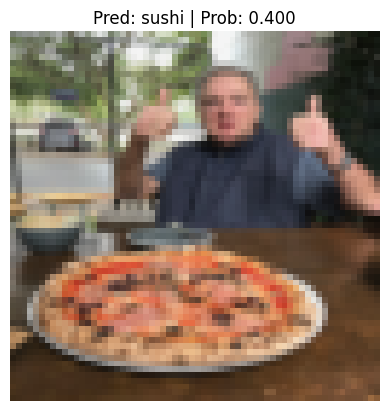

In [73]:
# Dự đoán trên hình ảnh tùy chỉnh của chúng ta (Pred on our custom image)
pred_and_plot_image(model=model_1,
                    image_path=custom_image_path,
                    class_names=class_names,
                    transform=custom_image_transform,
                    device=device)

Hai ngón tay cái lên một lần nữa!

Có vẻ như mô hình của chúng ta dự đoán đúng chỉ bằng cách đoán.

Tuy nhiên, điều này sẽ không phải lúc nào cũng xảy ra với các hình ảnh khác...

Hình ảnh cũng bị pixelated (vì chúng ta đã thay đổi kích thước nó thành `[64, 64]` bằng cách sử dụng `custom_image_transform`.

> **Bài tập:** Thử thực hiện dự đoán với một trong những hình ảnh pizza, steak hoặc sushi của riêng bạn và xem điều gì xảy ra.

## Những điểm chính (Main takeaways)

Chúng ta đã đề cập khá nhiều điều trong module này.

Hãy tóm tắt nó bằng một số điểm chính.

* PyTorch có nhiều hàm tích hợp để xử lý tất cả các loại dữ liệu, từ thị giác đến văn bản đến âm thanh đến hệ thống đề xuất (recommendation systems).
* Nếu các hàm tải dữ liệu tích hợp của PyTorch không phù hợp với yêu cầu của bạn, bạn có thể viết code để tạo các tập dữ liệu tùy chỉnh (custom datasets) của riêng mình bằng cách kế thừa `torch.utils.data.Dataset`.
* `torch.utils.data.DataLoader` trong PyTorch giúp biến `Dataset` của bạn thành các iterables có thể được sử dụng khi huấn luyện và kiểm tra mô hình.
* Một phần lớn của machine learning là xử lý sự cân bằng giữa **overfitting** và **underfitting** (chúng ta đã thảo luận các phương pháp khác nhau cho mỗi loại ở trên, vì vậy một bài tập tốt sẽ là nghiên cứu thêm và viết code để thử các kỹ thuật khác nhau).
* Dự đoán trên dữ liệu tùy chỉnh của riêng bạn với mô hình đã được huấn luyện là có thể, miễn là bạn định dạng dữ liệu thành định dạng tương tự với những gì mô hình đã được huấn luyện. Hãy đảm bảo bạn chú ý đến ba lỗi lớn của PyTorch và deep learning:
    1. **Sai kiểu dữ liệu (datatypes)** - Mô hình của bạn mong đợi `torch.float32` khi dữ liệu của bạn là `torch.uint8`.
    2. **Sai shapes dữ liệu** - Mô hình của bạn mong đợi `[batch_size, color_channels, height, width]` khi dữ liệu của bạn là `[color_channels, height, width]`.
    3. **Sai thiết bị (devices)** - Mô hình của bạn ở trên GPU nhưng dữ liệu của bạn ở trên CPU.

## Bài tập (Exercises)

Tất cả các bài tập đều tập trung vào việc thực hành code trong các phần ở trên.

Bạn có thể hoàn thành chúng bằng cách tham khảo từng phần hoặc theo (các) tài liệu được liên kết.

Tất cả bài tập nên được hoàn thành bằng cách sử dụng [device-agnostic code](https://pytorch.org/docs/stable/notes/cuda.html#device-agnostic-code).

**Tài liệu:**
* [Exercise template notebook cho 04](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/extras/exercises/04_pytorch_custom_datasets_exercises.ipynb)
* [Example solutions notebook cho 04](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/extras/solutions/04_pytorch_custom_datasets_exercise_solutions.ipynb) (hãy thử các bài tập *trước khi* xem cái này)

1. Các mô hình của chúng ta đang hoạt động kém (không fit dữ liệu tốt). 3 phương pháp để ngăn chặn underfitting là gì? Viết chúng ra và giải thích từng cái bằng một câu.
2. Tái tạo các hàm tải dữ liệu mà chúng ta đã xây dựng trong các phần 1, 2, 3 và 4. Bạn nên có `DataLoader` train và test sẵn sàng để sử dụng.
3. Tái tạo `model_0` mà chúng ta đã xây dựng trong phần 7.
4. Tạo các hàm training và testing cho `model_0`.
5. Thử huấn luyện mô hình mà bạn đã tạo trong bài tập 3 cho 5, 20 và 50 epochs, điều gì xảy ra với kết quả?
    * Sử dụng `torch.optim.Adam()` với learning rate 0.001 làm optimizer.
6. Tăng gấp đôi số hidden units trong mô hình của bạn và huấn luyện nó trong 20 epochs, điều gì xảy ra với kết quả?
7. Tăng gấp đôi dữ liệu bạn đang sử dụng với mô hình và huấn luyện nó trong 20 epochs, điều gì xảy ra với kết quả?
    * **Lưu ý:** Bạn có thể sử dụng [custom data creation notebook](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/extras/04_custom_data_creation.ipynb) để mở rộng quy mô Food101 dataset của bạn.
    * Bạn cũng có thể tìm thấy [already formatted double data (20% instead of 10% subset) dataset trên GitHub](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/data/pizza_steak_sushi_20_percent.zip), bạn sẽ cần viết code tải xuống như trong bài tập 2 để đưa nó vào notebook này.
8. Thực hiện dự đoán trên hình ảnh tùy chỉnh của riêng bạn về pizza/steak/sushi (bạn thậm chí có thể tải xuống một cái từ internet) và chia sẻ dự đoán của bạn.
    * Mô hình mà bạn đã huấn luyện trong bài tập 7 có dự đoán đúng không?
    * Nếu không, bạn nghĩ bạn có thể làm gì để cải thiện nó?

## Chương trình ngoại khóa (Extra-curriculum)

* Để thực hành kiến thức của bạn về PyTorch `Dataset` và `DataLoader` thông qua PyTorch [datasets and dataloaders tutorial notebook](https://pytorch.org/tutorials/beginner/basics/data_tutorial.html).
* Dành 10 phút đọc [PyTorch `torchvision.transforms` documentation](https://pytorch.org/vision/stable/transforms.html).
    * Bạn có thể xem các demo về transforms đang hoạt động trong [illustrations of transforms tutorial](https://pytorch.org/vision/main/auto_examples/transforms/plot_transforms_illustrations.html).
* Dành 10 phút đọc PyTorch [`torchvision.datasets` documentation](https://pytorch.org/vision/stable/datasets.html).
    * Một số datasets nào nổi bật với bạn?
    * Bạn có thể thử xây dựng mô hình trên những cái này như thế nào?
* [TorchData hiện đang ở phiên bản beta](https://pytorch.org/data/beta/index.html) (tính đến tháng 4 năm 2022), nó sẽ là cách tương lai để tải dữ liệu trong PyTorch, nhưng bạn có thể bắt đầu kiểm tra nó ngay bây giờ.
* Để tăng tốc các mô hình deep learning, bạn có thể thực hiện một vài thủ thuật để cải thiện tính toán compute, memory và overhead, để biết thêm hãy đọc bài viết [*Making Deep Learning Go Brrrr From First Principles*](https://horace.io/brrr_intro.html) của Horace He.